# SCC-ICMC-USP - 1o. semestre de 2021
# SCC5871/MAI5025 - APRENDIZADO DE MÁQUINA
# **Projeto Final**

### Profa. Roseli A. F. Romero

### PAE: Guilherme V. Nardari

Nro do grupo: 5

Alunos:


1. Bruno Ken Marchezepe
1. Hevans Vinicius Pereira
2. Renata Sarmet Smiderle Mendes
3. Ricardo Franca Fernandes do Vale 

## Leitura e manipulação do dataset

Os dados trabalhados a seguir foram extraídos do domínio https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos e contém os seguintes atributos:

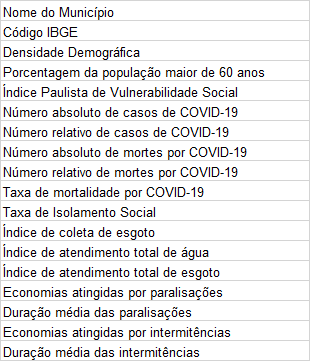

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle

In [2]:
#Importar dados de saneamento
sanitation_data = pd.read_csv('datasets/dados_saneamento.csv')
sanitation_data.head()

city_name  CD_GEOCMU    dd index_age  ipvs  cases  cases_inhab  \
0        Adamantina    3500105  0.82     21.8%     2    470         1387   
1            Adolfo    3500204  0.16     22.1%     4    128         3713   
2             Aguaí    3500303  0.75     14.7%     2    372         1045   
3    Águas da Prata    3500402  0.55     22.2%     2     69          885   
4  Águas de Lindóia    3500501  3.06     17.8%     2    187         1018   

   deaths  deaths_inhab mortality  isolation_rate  in015  in055  in056  in071  \
0      11            32      2.3%             NaN   98.4  100.0   99.7    809   
1       5           145      3.9%             NaN  100.0   99.9  100.0    120   
2       7            20      1.9%             NaN    0.6   89.8   87.8   2262   
3       5            64      7.2%             NaN   95.1   94.9   89.8   2273   
4       5            27      2.7%             NaN   80.0   99.1   98.6    938   

   in072  in073 in074  
0   6.00      0     0  
1   8.00      0     0  
2   6.04   7254  7.57  
3   6.21      0     0  
4   8.00    704     7

In [3]:
#Considera media de isolamento até 10/11/20 (considerado o fim da primeira onda por ser o dia de menor média móvel de casos)
isolation_data = pd.read_csv('datasets/isolamento.csv')
isolation_data.head()

Município1  Código Município IBGE  População estimada (2020) UF1   Média  \
0   AMERICANA              3501608.0                   242018.0  SP  41.70%   
1      AMPARO              3501905.0                    72677.0  SP  43.58%   
2   ANDRADINA              3502101.0                    57202.0  SP  43.55%   
3   ARAÇATUBA              3502804.0                   198129.0  SP  38.78%   
4  ARARAQUARA              3503208.0                   238339.0  SP  40.18%   

  26/02/20 27/02/20 28/02/20 29/02/20 01/03/20  ... 02/11/20 03/11/20  \
0      36%      34%      34%      35%      37%  ...      45%      36%   
1      33%      33%      33%      35%      36%  ...      43%      39%   
2      37%      36%      36%      36%      37%  ...      45%      41%   
3      32%      NaN      NaN      NaN      33%  ...      39%      34%   
4      NaN      NaN      NaN      NaN      33%  ...      42%      35%   

  04/11/20 05/11/20 06/11/20 07/11/20 08/11/20 09/11/20 10/11/20 Média.1  
0      37%      35%      35%      37%      43%      37%      37%     42%  
1      37%      36%      37%      37%      42%      38%      37%     44%  
2      42%      41%      42%      42%      45%      39%      40%     44%  
3      34%      34%      32%      35%      41%      34%      34%     39%  
4      36%      35%      34%      38%      40%      34%      34%     40%  

[5 rows x 262 columns]

In [4]:
#Insere a coluna de isolamento médio na base de dados
isolation_data = isolation_data.rename(columns = {'Código Município IBGE': 'CD_GEOCMU'}, inplace = False)
sanitation_data = sanitation_data.join(isolation_data[['CD_GEOCMU', 'Média']].set_index('CD_GEOCMU'), on='CD_GEOCMU', how='left')
sanitation_data['isolation_rate'] = sanitation_data['Média']
sanitation_data = sanitation_data.drop(['Média'], axis=1)
sanitation_data.head(30)

city_name  CD_GEOCMU     dd index_age  ipvs  cases  \
0               Adamantina    3500105   0.82     21.8%     2    470   
1                   Adolfo    3500204   0.16     22.1%     4    128   
2                    Aguaí    3500303   0.75     14.7%     2    372   
3           Águas da Prata    3500402   0.55     22.2%     2     69   
4         Águas de Lindóia    3500501   3.06     17.8%     2    187   
5   Águas de Santa Bárbara    3500550   0.15     18.6%     2     27   
6       Águas de São Pedro    3500600   8.65     24.5%     2     61   
7                   Agudos    3500709   0.37     15.3%     2    780   
8                 Alambari    3500758   3.62     14.4%     4     86   
9        Alfredo Marcondes    3500808   0.33     23.1%     2     68   
10                  Altair    3500907   0.13     13.7%     4     51   
11             Altinópolis    3501004   0.17     19.2%     2    225   
12             Alto Alegre    3501103   0.13     24.0%     4     77   
13                Alumínio    3501152   2.15     12.4%     2    276   
14        Álvares Florence    3501202   0.10     27.4%     2     78   
15         Álvares Machado    3501301   0.68     17.9%     2    282   
16      Álvaro de Carvalho    3501400   0.33     11.6%     4     32   
17             Alvinlândia    3501509   0.37     15.9%     4     27   
18               Americana    3501608  17.43     17.3%     2   5707   
19     Américo Brasiliense    3501707   3.28     11.1%     2    792   
20       Américo de Campos    3501806   0.23     22.1%     4    336   
21                  Amparo    3501905   1.56     18.3%     2   1271   
22               Analândia    3502002   0.15     16.8%     2     39   
23               Andradina    3502101   0.58     19.2%     2   1632   
24                Angatuba    3502200   0.24     15.4%     2    335   
25                 Anhembi    3502309   0.09     14.6%     2     23   
26                 Anhumas    3502408   0.12     17.2%     4     93   
27               Aparecida    3502507   2.95     16.9%     2    552   
28       Aparecida D Oeste    3502606  23.08     24.1%     4    290   
29                   Apiaí    3502705   0.25     14.9%     3    160   

    cases_inhab  deaths  deaths_inhab mortality isolation_rate  in015  in055  \
0          1387      11            32      2.3%            NaN   98.4  100.0   
1          3713       5           145      3.9%            NaN  100.0   99.9   
2          1045       7            20      1.9%            NaN    0.6   89.8   
3           885       5            64      7.2%            NaN   95.1   94.9   
4          1018       5            27      2.7%            NaN   80.0   99.1   
5           455       1            17      3.7%            NaN   75.9   74.9   
6          1954       1            32      1.6%            NaN   94.6   97.2   
7          2159      16            44      2.1%            NaN   90.2  100.0   
8          1488       3            52      3.5%            NaN   65.1   80.9   
9          1732       3            76      4.4%            NaN   92.5  100.0   
10         1264       3            74      5.9%            NaN   98.2   82.0   
11         1447       8            51      3.6%            NaN   70.6   87.4   
12         1917       3            75      3.9%            NaN  100.0   81.4   
13         1536       9            50      3.3%            NaN   68.6   75.5   
14         2154       5           138      6.4%            NaN   80.0   76.2   
15         1185       8            34      2.8%            NaN  100.0  100.0   
16          634       4            79     12.5%            NaN  100.0   65.5   
17          850       0             0      0.0%            NaN  100.0   93.3   
18         2445     172            74      3.0%         41.70%   93.6   99.5   
19         1968      14            35      1.8%            NaN   60.9   97.7   
20         5858      11           192      3.3%            NaN   82.8   85.5   
21         1825      32            46      2.5%        

In [5]:
sanitation_data.shape

(645, 18)

In [6]:
sanitation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city_name       645 non-null    object 
 1   CD_GEOCMU       645 non-null    int64  
 2   dd              645 non-null    float64
 3   index_age       645 non-null    object 
 4   ipvs            645 non-null    int64  
 5   cases           645 non-null    int64  
 6   cases_inhab     645 non-null    int64  
 7   deaths          645 non-null    int64  
 8   deaths_inhab    645 non-null    int64  
 9   mortality       645 non-null    object 
 10  isolation_rate  139 non-null    object 
 11  in015           645 non-null    float64
 12  in055           645 non-null    float64
 13  in056           645 non-null    float64
 14  in071           645 non-null    int64  
 15  in072           645 non-null    float64
 16  in073           645 non-null    int64  
 17  in074           645 non-null    obj

In [7]:
# rename columns
sanitation_data = sanitation_data.rename(columns={"dd": "demographic_density",
                                "in015": "sewage_collection_rate", 
                                "in055": "total_water_service_rate", 
                                "in056": "total_sewage_service_rate", 
                                "in071": "economies_hit_by_stoppages", 
                                "in072": "average_duration_of_stoppages",
                                "in073": "economies_hit_by_intermittences", 
                                "in074": "average_duration_of_intermittences" })

In [8]:
#Exclusão de dados que não contenham taxa de isolamento
sanitation_data.drop(sanitation_data.loc[sanitation_data.isolation_rate.isna()].index, inplace=True)

# Convert index_age, mortality and isolation_rate to float percentage
sanitation_data['index_age'] = sanitation_data['index_age'].str.rstrip('%').astype('float') / 100.0
sanitation_data['mortality'] = sanitation_data['mortality'].str.rstrip('%').astype('float') / 100.0
sanitation_data['isolation_rate'] = sanitation_data['isolation_rate'].str.rstrip('%').astype('float') / 100.0

#Transformação de tipo de dados na coluna 'in074'
sanitation_data['average_duration_of_intermittences'] = sanitation_data['average_duration_of_intermittences'].astype(float)

sanitation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 18 to 643
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city_name                           139 non-null    object 
 1   CD_GEOCMU                           139 non-null    int64  
 2   demographic_density                 139 non-null    float64
 3   index_age                           139 non-null    float64
 4   ipvs                                139 non-null    int64  
 5   cases                               139 non-null    int64  
 6   cases_inhab                         139 non-null    int64  
 7   deaths                              139 non-null    int64  
 8   deaths_inhab                        139 non-null    int64  
 9   mortality                           139 non-null    float64
 10  isolation_rate                      139 non-null    float64
 11  sewage_collection_rate              139 non-

In [9]:
sanitation_data.shape

(139, 18)

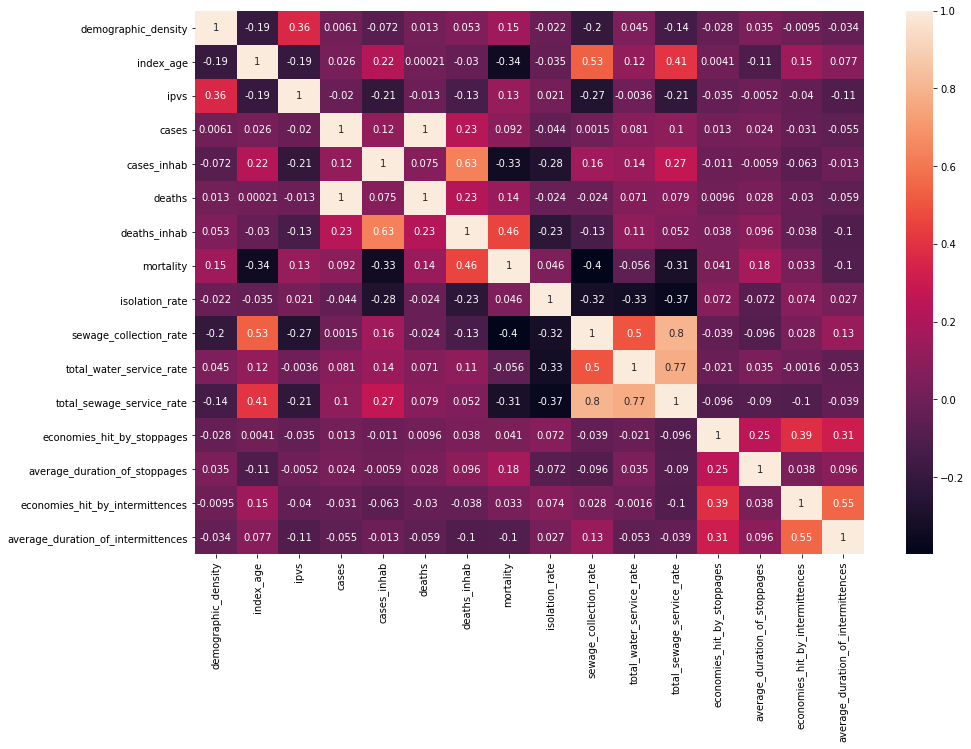

In [10]:
#Matriz de Correlação de Pearson 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data = sanitation_data.iloc[:,range(2,18)].corr(), annot=True, ax=ax)
plt.show()

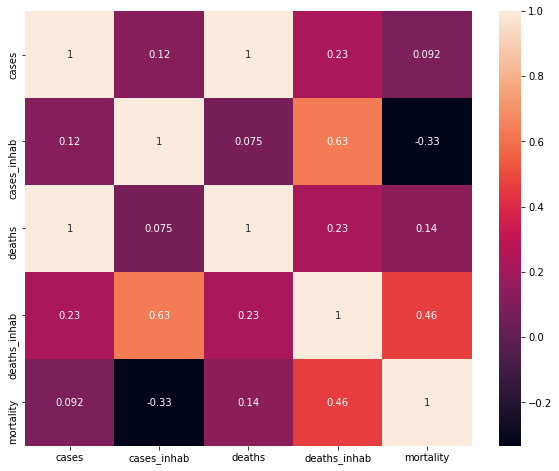

In [11]:
#Matriz de Correlação de Pearson - casos e mortalidade
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data = sanitation_data.iloc[:,range(5,10)].corr(), annot=True, ax=ax)
plt.show()

### Mortes e casos inhab são altamente correlacionados
### Casos e mortes inhab, também representam parecido com taxa de mortalidade 
### Engraçado que mortalidade e casos inhab são inversamente correlacionados
### mas vamos deixar os 3 por hora
#### Casos e mortes serão mantidos apenas em valores relativos

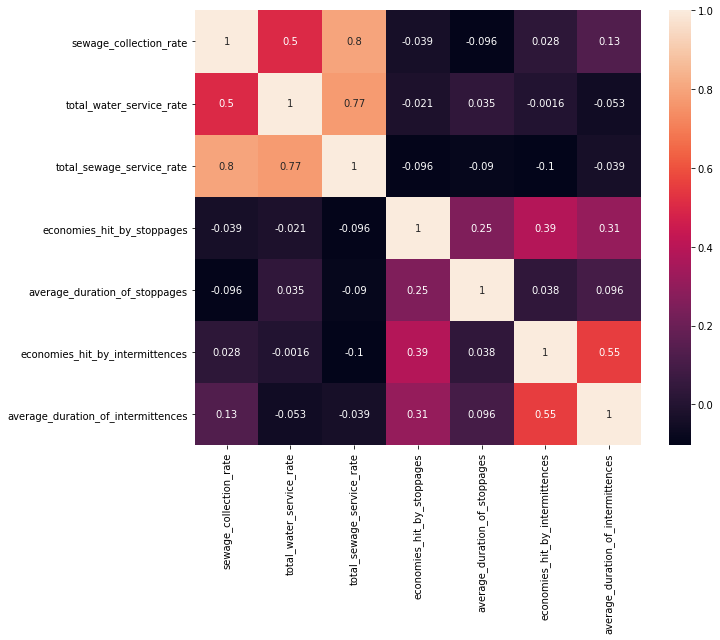

In [12]:
#Matriz de Correlação de Pearson - Saneamento
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data = sanitation_data.iloc[:,range(11,18)].corr(), annot=True, ax=ax)
plt.show()

### Indice de atendimento total de esgoto e indice de coleta de esgoto são altamente correlacionados
### Indice total de água e de esgoto também são altamente correlacionados
#### Vamos apagar total_sewage_service_rate
### por hora vamos deixar sewage_collection_rate e total_water_service_rate, mesmo eles sendo bem correlacionados

## average_duration_of_intermittences e economies_hit_by_intermittences são bem correlacionadas
## ja as de stoppage são um pouco mas nem tanto
## economies_hit_by stoppages e intermittences são um pouco correlacionadas, assim como com o average_duration_intermittences
#### para simplificar o dataset, vamos tirar economies_hit_by_intermittences e average_duration_of_intermittences

In [13]:
# Exclusão das colunas redundantes
sanitation_data = sanitation_data.drop(['city_name', 'cases', 'deaths', 
                                        'economies_hit_by_intermittences',
                                        'average_duration_of_intermittences', 
                                        'total_sewage_service_rate'], axis=1)

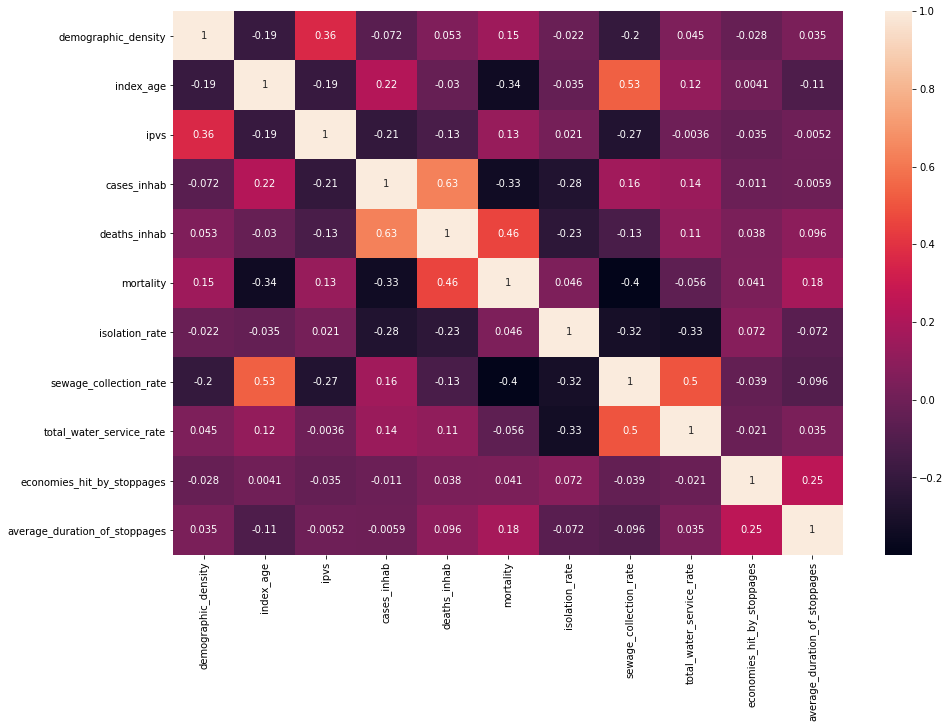

In [14]:
#Matriz de Correlação de Pearson 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data = sanitation_data.iloc[:,range(1,12)].corr(), annot=True, ax=ax)
plt.show()

## sewage_collectino_rate e index_age tem bastante correlação
## sewage_collection_rate tem alta correlação negativa com isolation_rate
## mortality e sewage_collection_rate tem alta correlação negativa
## mortality e index_age tem alta correlação negativa

## Visualização de Mapas

In [15]:
#Cria mapa e mescla com base com base de dados
import geopandas as gpd

sp = gpd.read_file('https://github.com/ricardoffv/covid_sp_databases/raw/main/SP/35MUE250GC_SIR.shp.zip')

sp.CD_GEOCMU = sp.CD_GEOCMU.astype(int)

sp = sp.merge(sanitation_data, on='CD_GEOCMU')

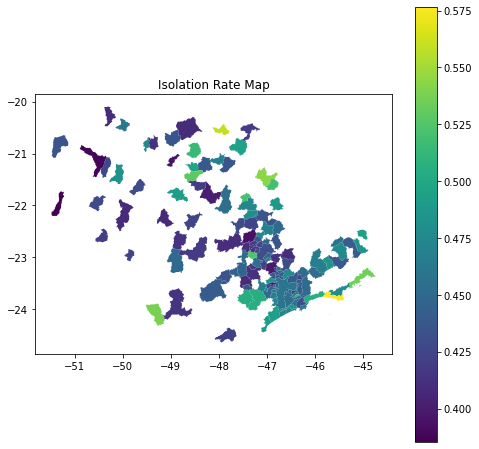

In [16]:
# Mapa de isolamento
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Isolation Rate Map')
sp.plot(column = 'isolation_rate', ax=ax, legend=True, figsize=(15,8))
plt.show()

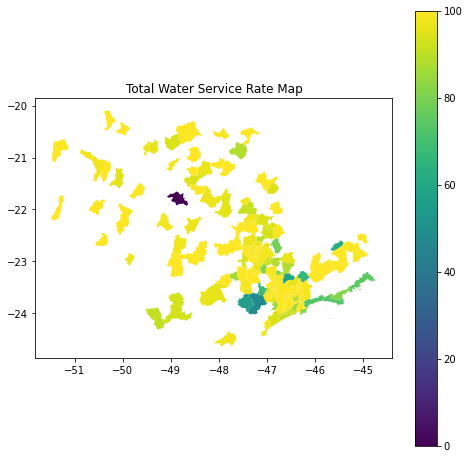

In [17]:
#Mapa de Taxa de abastecimento de água
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Total Water Service Rate Map')
sp.plot(column = 'total_water_service_rate', ax=ax, legend=True, figsize=(15,8))
plt.show()

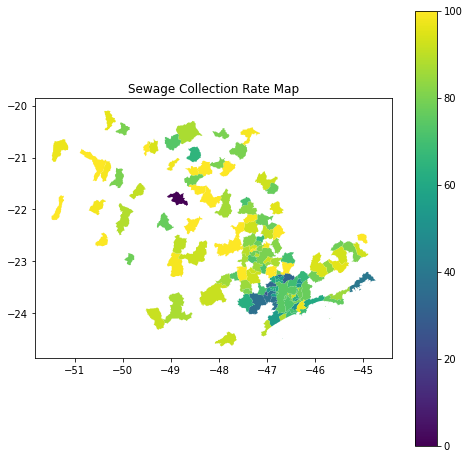

In [18]:
#Mapa de índice de coleta de esgoto
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Sewage Collection Rate Map')
sp.plot(column = 'sewage_collection_rate', ax=ax, legend=True, figsize=(15,8))
plt.show()

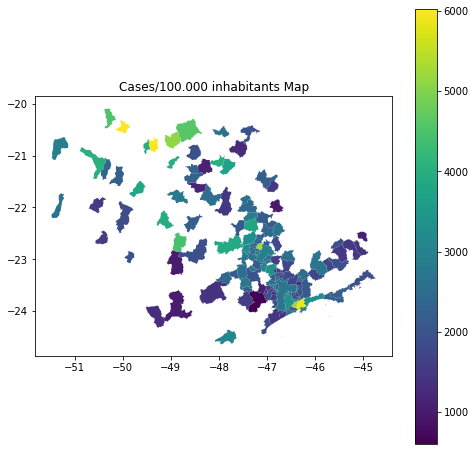

In [19]:
# Mapa de Casos a cada 100.000 habitantes
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Cases/100.000 inhabitants Map')
sp.plot(column = 'cases_inhab', ax=ax, legend=True, figsize=(15,8))
plt.show()

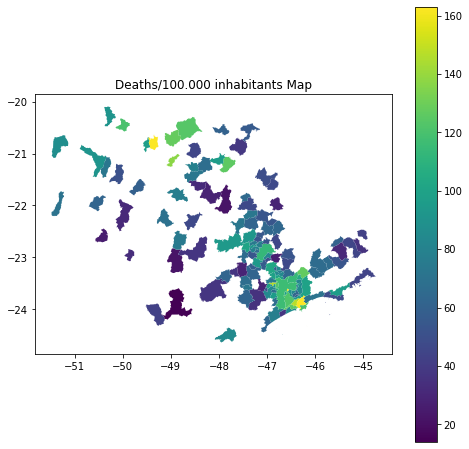

In [20]:
# Mapa de Mortes a cada 100.000 habitantes
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Deaths/100.000 inhabitants Map')
sp.plot(column = 'deaths_inhab', ax=ax, legend=True, figsize=(15,8))
plt.show()

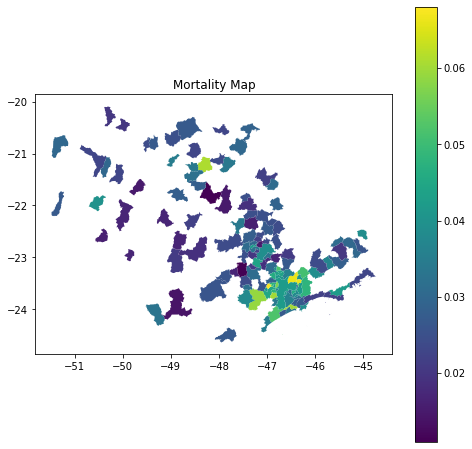

In [21]:
# Mapa de mortalidade
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Mortality Map')
sp.plot(column = 'mortality', ax=ax, legend=True, figsize=(15,8))
plt.show()

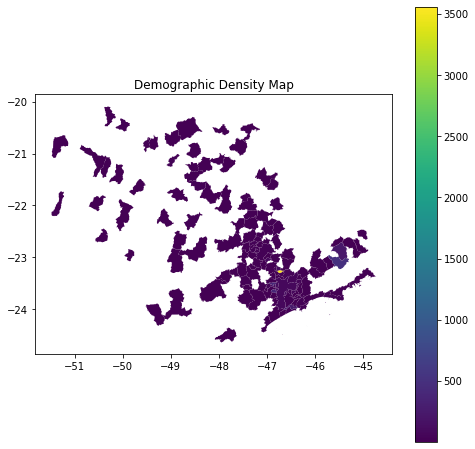

In [22]:
# Mapa de densidade demográfica
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Demographic Density Map')
sp.plot(column = 'demographic_density', ax=ax, legend=True, figsize=(15,8))
plt.show()

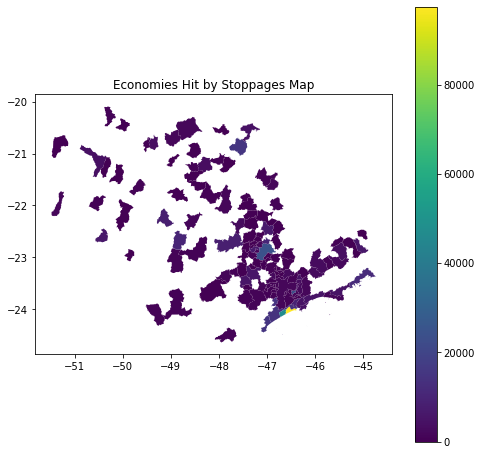

In [23]:
# Mapa de Economias atingidas por parasilações
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Economies Hit by Stoppages Map')
sp.plot(column = 'economies_hit_by_stoppages', ax=ax, legend=True, figsize=(15,8))
plt.show()

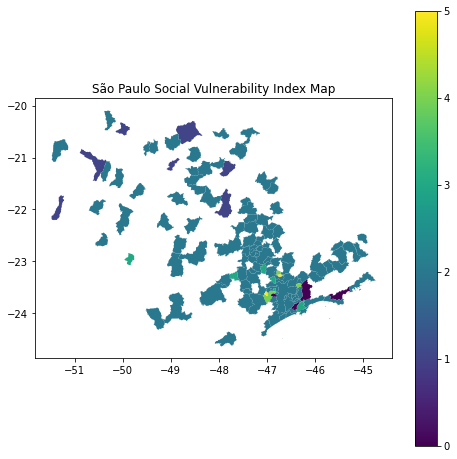

In [24]:
# Mapa do Indice Paulista de Vulnerabilidade Social 
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('São Paulo Social Vulnerability Index Map')
sp.plot(column = 'ipvs', ax=ax, legend=True, figsize=(15,8))
plt.show()

## Clusterização

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

def preprocess(X):
    # Aplicando a normalizacao nos dados StandardScalar e PCA
    std_PCA = make_pipeline(StandardScaler(), PCA(n_components=2))
    X_scaled = std_PCA.fit_transform(X)
    return X_scaled

In [26]:
sanitation_data_X = preprocess(sanitation_data.set_index('CD_GEOCMU'))

### Kmeans

In [27]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(sanitation_data_X)

## Testamos outros valores par ao n_clusters, mas 6 foi o que melhor se encaixou nos dados

In [28]:
print("inertia:", kmeans.inertia_)

inertia: 118.84201519598761


In [29]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
print('Silhouette score:', silhouette_score(sanitation_data_X, kmeans.labels_, metric='euclidean', random_state=0))

# The higher the score , the better the performances.
print('Calinski Harabasz score:', calinski_harabasz_score(sanitation_data_X, kmeans.labels_))

#The minimum score is zero, with lower values indicating better clustering.
print('Davies Bouldin score:', davies_bouldin_score(sanitation_data_X, kmeans.labels_))

Silhouette score: 0.3621569968673422
Calinski Harabasz score: 109.68686567154236
Davies Bouldin score: 0.826089452907803


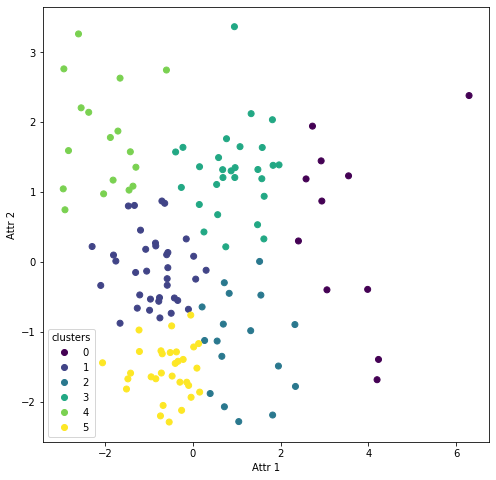

In [30]:
X = sanitation_data_X
y = kmeans.labels_

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('Attr 1')
plt.ylabel('Attr 2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

### AffinityPropagation

In [31]:
from sklearn.cluster import AffinityPropagation

In [32]:
affinityPropagation = AffinityPropagation(random_state=0).fit(sanitation_data_X)

In [33]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
print('Silhouette score:', silhouette_score(sanitation_data_X, affinityPropagation.labels_, metric='euclidean', random_state=0))

# The higher the score , the better the performances.
print('Calinski Harabasz score:', calinski_harabasz_score(sanitation_data_X, affinityPropagation.labels_))

#The minimum score is zero, with lower values indicating better clustering.
print('Davies Bouldin score:', davies_bouldin_score(sanitation_data_X, affinityPropagation.labels_))

Silhouette score: 0.2944624497621102
Calinski Harabasz score: 105.58983340945328
Davies Bouldin score: 0.8084318101741732


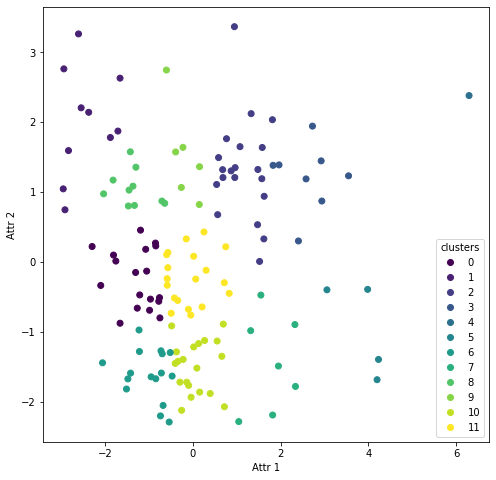

In [34]:
X = sanitation_data_X
y = affinityPropagation.labels_

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('Attr 1')
plt.ylabel('Attr 2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

### AgglomerativeClustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
agglomerativeClustering = AgglomerativeClustering(n_clusters=6).fit(sanitation_data_X)

In [37]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
print('Silhouette score:', silhouette_score(sanitation_data_X, agglomerativeClustering.labels_, metric='euclidean', random_state=0))

# The higher the score , the better the performances.
print('Calinski Harabasz score:', calinski_harabasz_score(sanitation_data_X, agglomerativeClustering.labels_))

#The minimum score is zero, with lower values indicating better clustering.
print('Davies Bouldin score:', davies_bouldin_score(sanitation_data_X, agglomerativeClustering.labels_))

Silhouette score: 0.29159000978445243
Calinski Harabasz score: 89.30153625829558
Davies Bouldin score: 0.8431586034788081


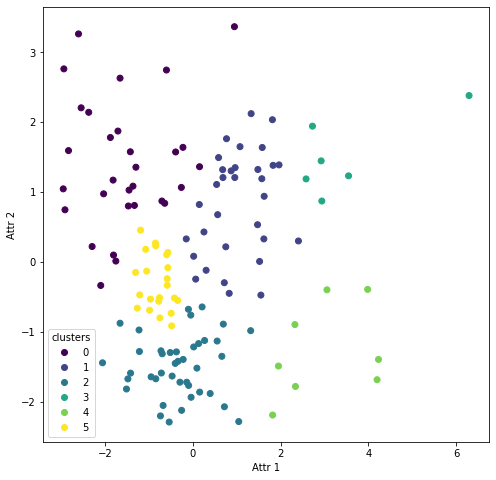

In [38]:
X = sanitation_data_X
y = agglomerativeClustering.labels_

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('Attr 1')
plt.ylabel('Attr 2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

### SpectralClustering

In [39]:
from sklearn.cluster import SpectralClustering

In [40]:
spectralClustering = SpectralClustering(n_clusters=6).fit(sanitation_data_X)

In [41]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
print('Silhouette score:', silhouette_score(sanitation_data_X, spectralClustering.labels_, metric='euclidean', random_state=0))

# The higher the score , the better the performances.
print('Calinski Harabasz score:', calinski_harabasz_score(sanitation_data_X, spectralClustering.labels_))

#The minimum score is zero, with lower values indicating better clustering.
print('Davies Bouldin score:', davies_bouldin_score(sanitation_data_X, spectralClustering.labels_))

Silhouette score: 0.32423302608731197
Calinski Harabasz score: 54.76793520609934
Davies Bouldin score: 0.7121337433569317


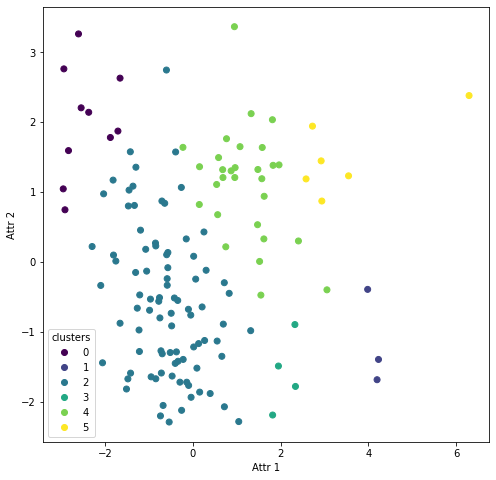

In [42]:
X = sanitation_data_X
y = spectralClustering.labels_

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('Attr 1')
plt.ylabel('Attr 2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

#### Considerando as métricas dos clusters e as distribuições destes, vamos seguir com o kmeans

### Análises clusters - kmeans

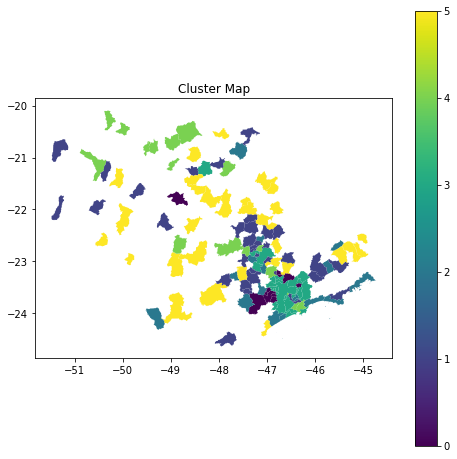

In [43]:
# Criando coluna com clusters
sp['cluster'] = kmeans.labels_

# Mapa do Cluster
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Cluster Map')
sp.plot(column = 'cluster', ax=ax, legend=True, figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='cluster'>

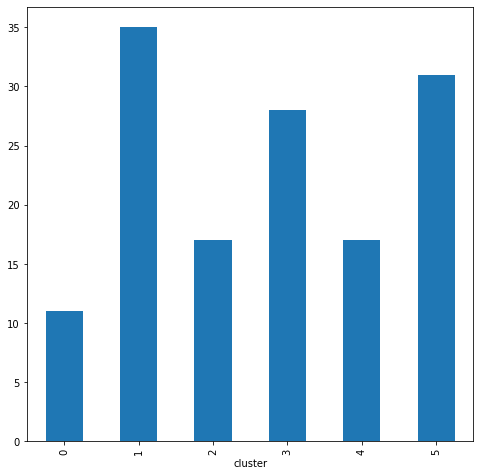

In [44]:
sp.groupby('cluster').NM_MUNICIP.count().plot(kind='bar')

### Análise de cada variável comparando com a taxa de mortalidade

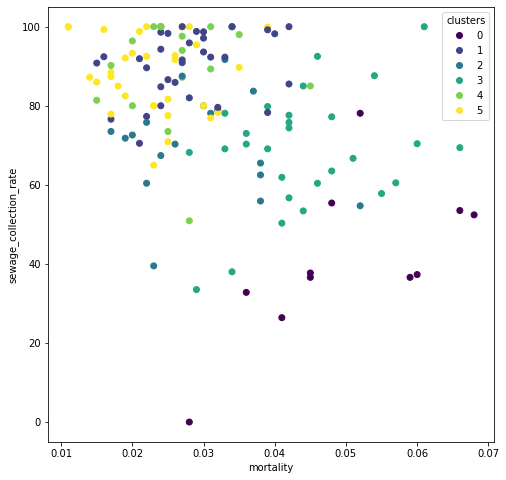

In [45]:
X = np.array(sp[['mortality', 'sewage_collection_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('sewage_collection_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

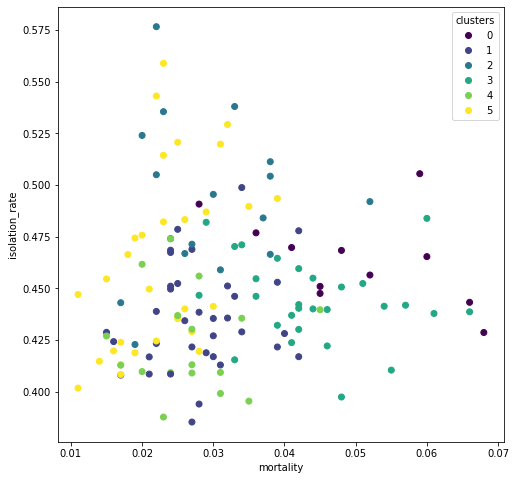

In [46]:
X = np.array(sp[['mortality', 'isolation_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('isolation_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

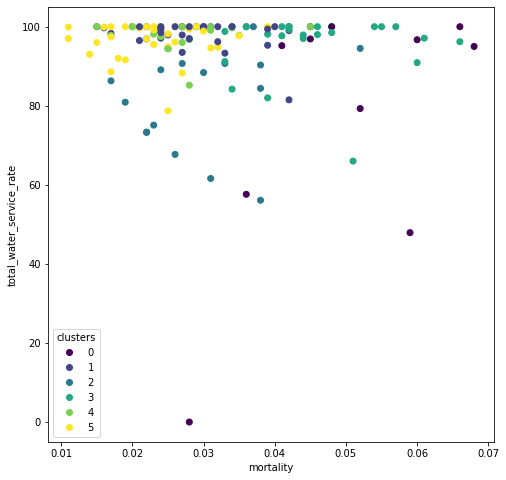

In [47]:
X = np.array(sp[['mortality', 'total_water_service_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('total_water_service_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

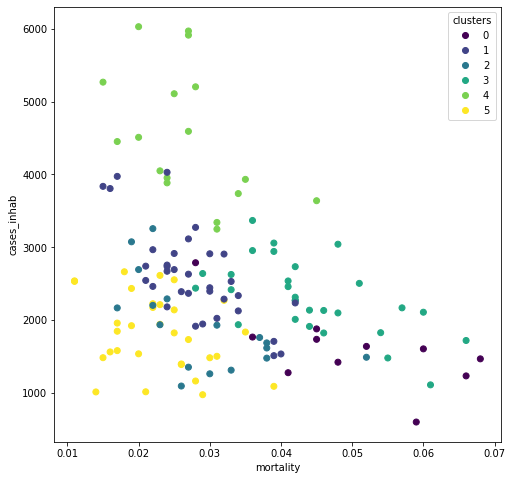

In [48]:
X = np.array(sp[['mortality', 'cases_inhab']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('cases_inhab')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

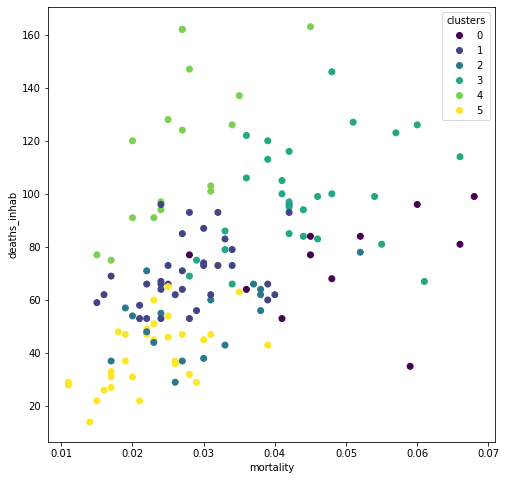

In [49]:
X = np.array(sp[['mortality', 'deaths_inhab']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('deaths_inhab')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

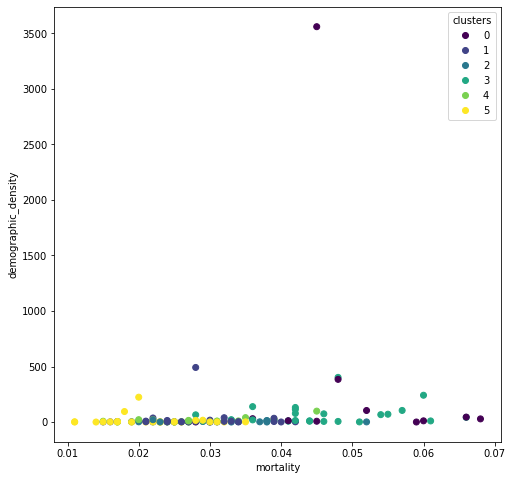

In [50]:
X = np.array(sp[['mortality', 'demographic_density']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('demographic_density')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

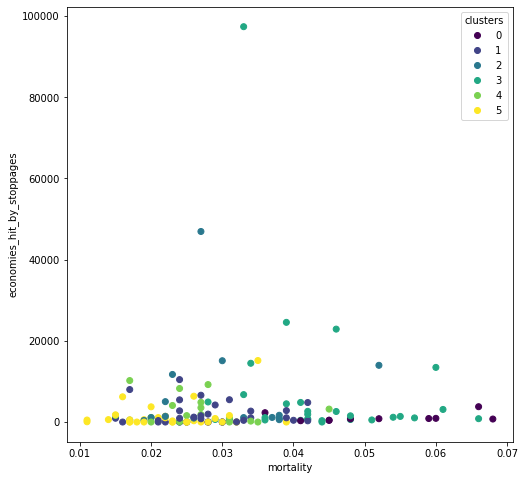

In [51]:
X = np.array(sp[['mortality', 'economies_hit_by_stoppages']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('economies_hit_by_stoppages')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

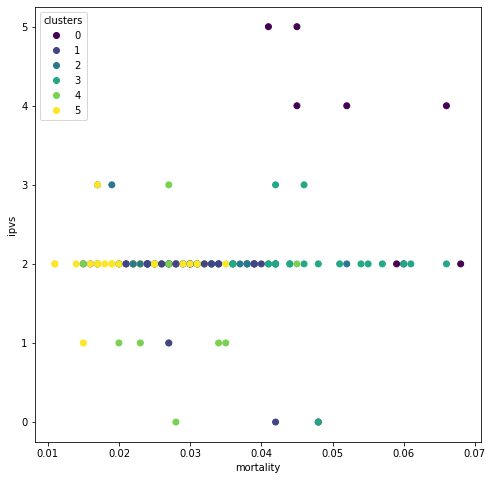

In [52]:
X = np.array(sp[['mortality', 'ipvs']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('mortality')
plt.ylabel('ipvs')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

### Análise de cada variável comparando com a quantidade de mortes a cada 100mil habitantes

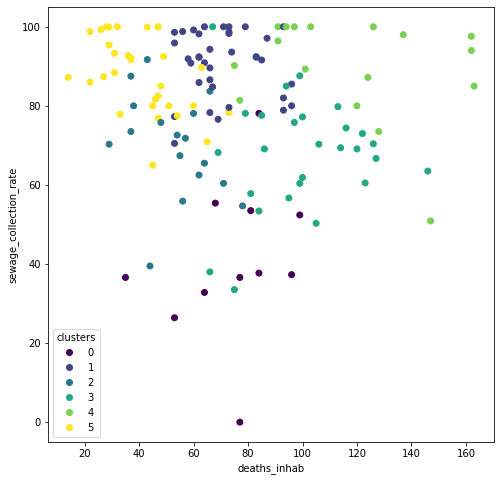

In [53]:
X = np.array(sp[['deaths_inhab', 'sewage_collection_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('sewage_collection_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

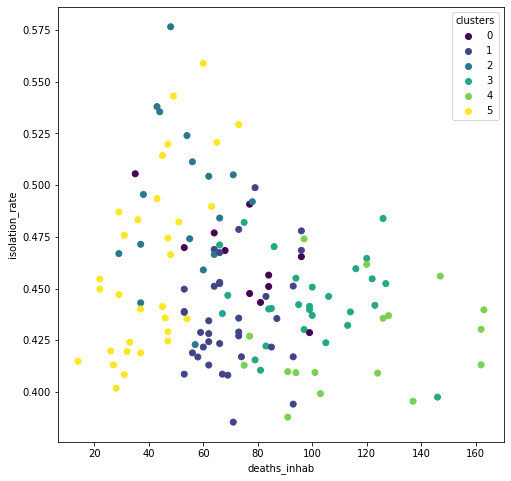

In [54]:
X = np.array(sp[['deaths_inhab', 'isolation_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('isolation_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

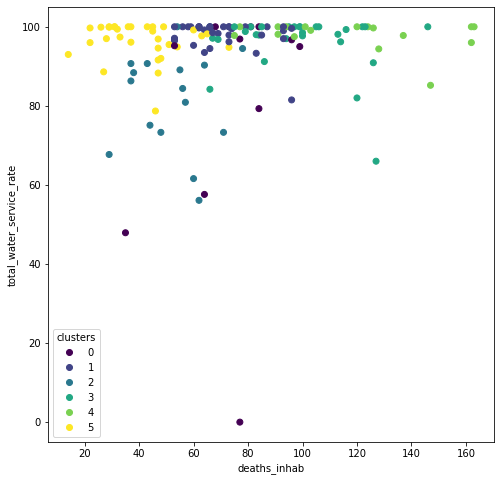

In [55]:
X = np.array(sp[['deaths_inhab', 'total_water_service_rate']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('total_water_service_rate')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

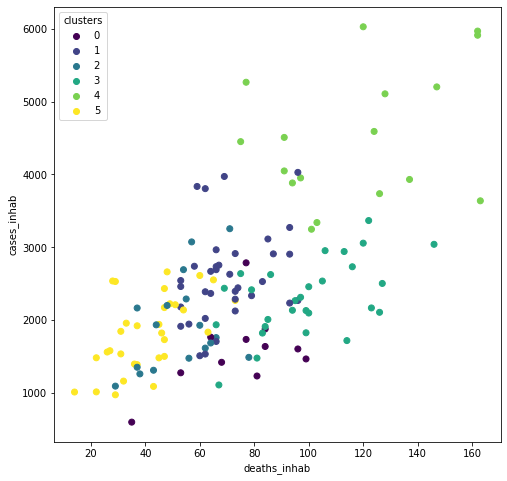

In [56]:
X = np.array(sp[['deaths_inhab', 'cases_inhab']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('cases_inhab')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

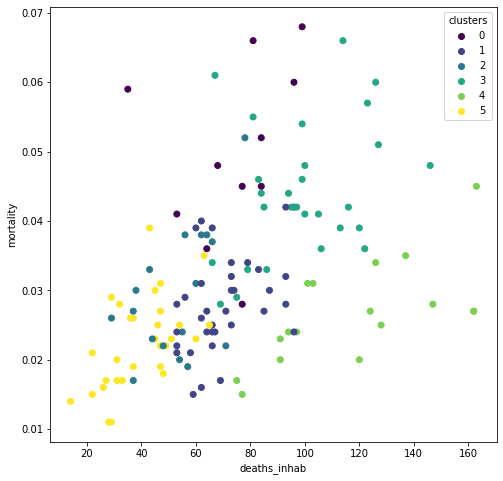

In [57]:
X = np.array(sp[['deaths_inhab', 'mortality']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('mortality')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

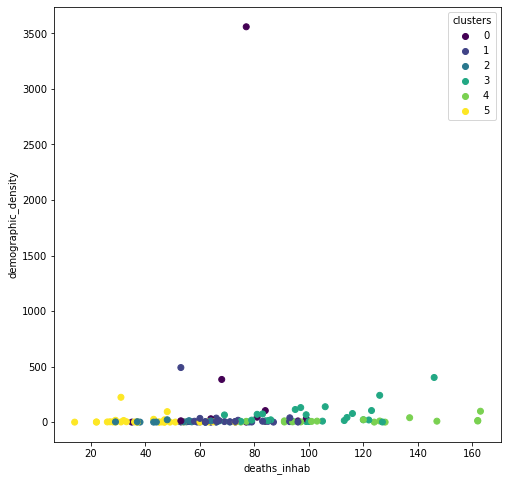

In [58]:
X = np.array(sp[['deaths_inhab', 'demographic_density']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('demographic_density')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

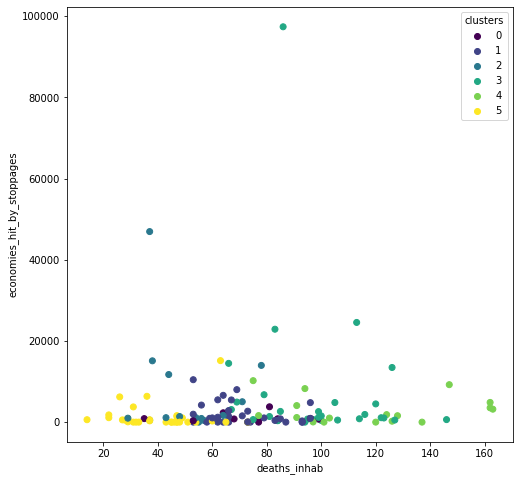

In [59]:
X = np.array(sp[['deaths_inhab', 'economies_hit_by_stoppages']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('economies_hit_by_stoppages')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

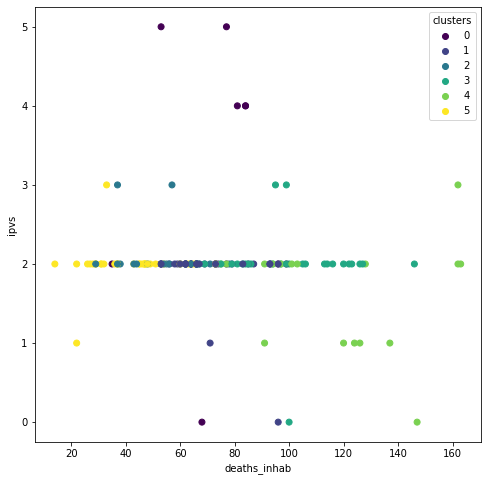

In [60]:
X = np.array(sp[['deaths_inhab', 'ipvs']])
y = sp['cluster']

scatter = plt.scatter(*X.T, c=y)
plt.xlabel('deaths_inhab')
plt.ylabel('ipvs')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=set(y),
           title="clusters")
plt.show()

In [61]:
sp.groupby('cluster').agg({'mortality': ['mean', 'max', 'min'],
                          'deaths_inhab': ['mean', 'max', 'min'],
                          'cases_inhab': ['mean', 'max', 'min']})

mortality               deaths_inhab           cases_inhab            
             mean    max    min         mean  max min         mean   max   min
cluster                                                                       
0        0.049818  0.068  0.028    74.363636   99  35  1584.272727  2788   602
1        0.028114  0.042  0.015    70.371429   96  53  2605.428571  4029  1513
2        0.029235  0.052  0.017    52.882353   78  29  1919.000000  3256  1096
3        0.044179  0.066  0.028    99.178571  146  66  2313.821429  3368  1112
4        0.026647  0.045  0.015   117.529412  163  75  4518.588235  6027  3249
5        0.022774  0.039  0.011    40.774194   73  14  1827.354839  2664   977

### Conclusão da clusterização
O cluster 5 se destacou como melhor cluster, independentemente se o critério base é taxa de mortalidade ou número de mortes a cada 100 mil habitantes.

Se fosse considerar o critério de número de mortes a cada 100 mil habitantes, o cluster 4 se destaca muito dos outros. Porém, os dados de saneamento básico e as demais features utilizadas parecem não ter tanta influência sobre o número de mortes a cada 100 mil habitantes. 

Considerando a taxa de mortalidade como critério, o cluster 0 ser destaca dos outros. O interessante dessa abordagem é que podemos ver a relação disso com as features utilizadas na clusterização. Então, seguiremos com essa abordagem.

Portanto, o cluster 0 é escolhido como o pior e o cluster 5 é escolhido como o melhor, considerando a taxa de mortalidade.

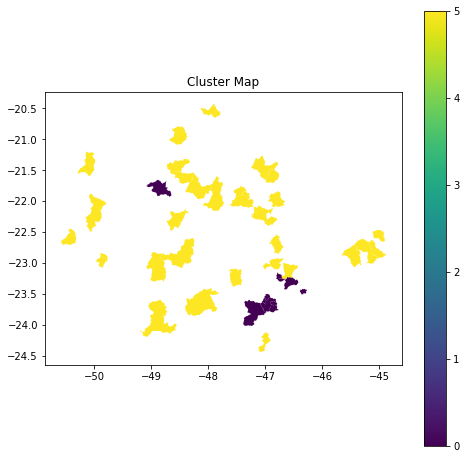

In [62]:
# Mapa do Cluster
plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
plt.title('Cluster Map')
sp[sp['cluster'].isin([0,5])].plot(column = 'cluster', ax=ax, legend=True, figsize=(15,8))
plt.show()

In [63]:
# Listando piores cidades considerando mortalidade
worst_cluster = sp[sp['cluster']==0][['NM_MUNICIP', 'mortality']].sort_values(by='mortality', ascending=False).reset_index(drop=True)
worst_cluster

NM_MUNICIP  mortality
0                  ITAPEVI      0.068
1          ITAQUAQUECETUBA      0.066
2     ITAPECERICA DA SERRA      0.060
3                   IBIÚNA      0.059
4     CAMPO LIMPO PAULISTA      0.052
5           EMBU DAS ARTES      0.048
6                    COTIA      0.045
7         FRANCISCO MORATO      0.045
8   VARGEM GRANDE PAULISTA      0.041
9                MAIRIPORÃ      0.036
10                IBITINGA      0.028

In [64]:
# Listando melhores cidades considerando mortalidade
best_cluster = sp[sp['cluster']==5][['NM_MUNICIP', 'mortality']].sort_values(by='mortality', ascending=True).reset_index(drop=True)
best_cluster

NM_MUNICIP  mortality
0             PORTO FELIZ      0.011
1              ARARAQUARA      0.011
2                 ITAPEVA      0.014
3              SÃO CARLOS      0.015
4                   ASSIS      0.016
5                 MARÍLIA      0.017
6                 ITATIBA      0.017
7                OURINHOS      0.017
8                 VINHEDO      0.018
9            PIRASSUNUNGA      0.019
10               BOTUCATU      0.019
11        PINDAMONHANGABA      0.020
12                  AVARÉ      0.021
13                    JAÚ      0.022
14                 MOCOCA      0.022
15              PENÁPOLIS      0.023
16              BEBEDOURO      0.023
17   SÃO JOAQUIM DA BARRA      0.023
18         PORTO FERREIRA      0.025
19                 AMPARO      0.025
20             MOGI GUAÇU      0.025
21                 LORENA      0.026
22           ITAPETININGA      0.026
23                ATIBAIA      0.027
24                  MATÃO      0.028
25  SÃO JOÃO DA BOA VISTA      0.029
26          GUARATINGUETÁ      0.030
27  SÃO JOSÉ DO RIO PARDO      0.031
28           TAQUARITINGA      0.032
29                PERUÍBE      0.035
30               CRUZEIRO      0.039

Agora, vamos selecionar as 5 cidades do cluster 0 que possuem as maiores taxas de mortalidade e as 5 cidades do cluster 5 que possuem as menores taxas de mortalidade.

Em seguida, vamos analisar entre cada grupo, a vacinação e a segunda onda da COVID-19.

In [65]:
list_top_worst_cities = worst_cluster[:5].NM_MUNICIP.to_list()
list_top_worst_cities

['ITAPEVI',
 'ITAQUAQUECETUBA',
 'ITAPECERICA DA SERRA',
 'IBIÚNA',
 'CAMPO LIMPO PAULISTA']

In [66]:
list_top_best_cities = best_cluster[:5].NM_MUNICIP.to_list()
list_top_best_cities

['PORTO FELIZ', 'ARARAQUARA', 'ITAPEVA', 'SÃO CARLOS', 'ASSIS']

## Dados de vacinação

Para fazer análises e ter uma melhor compreensão dos dados, utilizamos dados coletados do site https://opendatasus.saude.gov.br. Este site, mantido pelo Ministério da Saúde, contém diversas coleções de dados com informações variadas a respeito da COVID-19 no Brasil.

O dataset foi extraído do site https://opendatasus.saude.gov.br/dataset/bd-srag-2020 em 30 de junho de 2021 como um arquivo csv com tamanho aproximado de 60 Gb. Devido à dificuldade de se trabalhar com um arquivo tão grande decidiu-se trabalhar apenas com os dados do estado de São Paulo, além de realizar uma pré-seleção nas colunas de acordo com análise anterior, obtendo assim um arquivo com aproximadamente 3 Gb de tamanho.

#### Cada linha da tabela representa um registro de um paciente. Temos 8 variáveis:

*   **paciente_idade**: Float, representando a idade do paciente;
*   **paciente_enumsexobiologico**: Objeto string, representando o sexo biológico do paciente (M=masculino, F=feminino, I=indefinido);
*   **paciente_racacor_valor**: Objeto string, descrevendo a raça/cor do paciente; 
*   **estabelecimento_municipio_nome**: Objeto string, descrevendo o nome do município do estabelecimento no qual o paciente foi vacinado;
*   **vacina_categoria_nome**: Objeto string, descrevendo a categoria em que o paciente se enquadrou para a vacinação;
*   **vacina_dataaplicacao**: Objeto string, indicando a data em que o paciente foi vacinado;
*   **vacina_descricao_dose**: Objeto string, indicando a dose correspondente que o paciente tomou;
*   **vacina_nome**: Objeto string, descrevendo o nome da vacina que o paciente tomou;

In [67]:
# #Importar todos os dados de vacinacao
# vaccination_data_complete = pd.read_csv('datasets/vacinas_filtrados.csv', sep=';')

# # Selecinando cidades específicas
# vaccination_data = vaccination_data_complete[vaccination_data_complete.estabelecimento_municipio_nome.isin(
#     list_top_worst_cities +
#     list_top_best_cities)].drop('estabelecimento_uf', axis=1).reset_index(drop=True)

# # Salvando novo dataframe apenas com as cidades selecionadas
# vaccination_data.to_csv(path_or_buf='datasets/vacinas_cidades_selecionadas.csv', index=False)

In [68]:
#Importar dados de vacinacao
vaccination_data = pd.read_csv('datasets/vacinas_cidades_selecionadas.csv')
vaccination_data=vaccination_data.replace('SAO CARLOS', 'SÃO CARLOS')
vaccination_data=vaccination_data.replace('IBIUNA', 'IBIÚNA')
vaccination_data.head()

paciente_idade paciente_enumsexobiologico paciente_racacor_valor  \
0            53.0                          M                 BRANCA   
1            52.0                          M                 BRANCA   
2            64.0                          M         SEM INFORMACAO   
3            92.0                          F         SEM INFORMACAO   
4            60.0                          M                 BRANCA   

  estabelecimento_municipio_nome vacina_categoria_nome vacina_dataaplicacao  \
0                        ITAPEVA          Faixa Etária           2021-06-26   
1                ITAQUAQUECETUBA          Faixa Etária           2021-06-22   
2                     SÃO CARLOS          Faixa Etária           2021-04-24   
3           ITAPECERICA DA SERRA          Faixa Etária           2021-02-17   
4                    PORTO FELIZ          Faixa Etária           2021-05-07   

  vacina_descricao_dose                                        vacina_nome  
0               1ª Dose  Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...  
1               1ª Dose                       Vacina Covid-19 - Covishield  
2               1ª Dose                Covid-19-Coronavac-Sinovac/Butantan  
3               1ª Dose                       Vacina Covid-19 - Covishield  
4               1ª Dose                       Vacina Covid-19 - Covishield

In [69]:
vaccination_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802883 entries, 0 to 802882
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   paciente_idade                  802883 non-null  float64
 1   paciente_enumsexobiologico      802883 non-null  object 
 2   paciente_racacor_valor          802883 non-null  object 
 3   estabelecimento_municipio_nome  802883 non-null  object 
 4   vacina_categoria_nome           801703 non-null  object 
 5   vacina_dataaplicacao            802883 non-null  object 
 6   vacina_descricao_dose           802883 non-null  object 
 7   vacina_nome                     802883 non-null  object 
dtypes: float64(1), object(7)
memory usage: 49.0+ MB


In [70]:
print('Número de entradas/pacientes:\t {}'.format(vaccination_data.shape[0]))
print('Número de variáveis/atributos:\t {}'.format(vaccination_data.shape[1]))

Número de entradas/pacientes:	 802883
Número de variáveis/atributos:	 8


In [71]:
# Convertendo paciente idade para numérico
vaccination_data.loc[:,'paciente_idade'] = pd.to_numeric(vaccination_data.loc[:,'paciente_idade'], downcast="integer", errors='coerce')

# Convertendo data aplicacao para datetime
vaccination_data.loc[:,'vacina_dataaplicacao'] = pd.to_datetime(vaccination_data['vacina_dataaplicacao'], errors='coerce')


#  Criando uma variável temporária chamada vacina_dias_desde_aplicacao, 
# que representa a quantidade de dias desde a aplicação da vacina até 30/06/2021, 
# data em que os dados foram coletados.
vaccination_data['vacina_dias_desde_aplicacao'] = (pd.to_datetime('2021-06-30') - vaccination_data['vacina_dataaplicacao']).dt.days

In [72]:
vaccination_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802883 entries, 0 to 802882
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   paciente_idade                  802883 non-null  int16         
 1   paciente_enumsexobiologico      802883 non-null  object        
 2   paciente_racacor_valor          802883 non-null  object        
 3   estabelecimento_municipio_nome  802883 non-null  object        
 4   vacina_categoria_nome           801703 non-null  object        
 5   vacina_dataaplicacao            802883 non-null  datetime64[ns]
 6   vacina_descricao_dose           802883 non-null  object        
 7   vacina_nome                     802883 non-null  object        
 8   vacina_dias_desde_aplicacao     802883 non-null  int64         
dtypes: datetime64[ns](1), int16(1), int64(1), object(6)
memory usage: 50.5+ MB


In [73]:
# Confirmando quantidade de valores ausentes
vaccination_data.isnull().sum().sort_values(ascending=False)

vacina_categoria_nome             1180
paciente_idade                       0
paciente_enumsexobiologico           0
paciente_racacor_valor               0
estabelecimento_municipio_nome       0
vacina_dataaplicacao                 0
vacina_descricao_dose                0
vacina_nome                          0
vacina_dias_desde_aplicacao          0
dtype: int64

In [74]:
vaccination_worst_cities = vaccination_data[vaccination_data.estabelecimento_municipio_nome.isin(list_top_worst_cities)].reset_index(drop=True)
vaccination_worst_cities.head()

paciente_idade paciente_enumsexobiologico paciente_racacor_valor  \
0              52                          M                 BRANCA   
1              92                          F         SEM INFORMACAO   
2              44                          F         SEM INFORMACAO   
3              59                          M                 BRANCA   
4              46                          M         SEM INFORMACAO   

  estabelecimento_municipio_nome vacina_categoria_nome vacina_dataaplicacao  \
0                ITAQUAQUECETUBA          Faixa Etária           2021-06-22   
1           ITAPECERICA DA SERRA          Faixa Etária           2021-02-17   
2           ITAPECERICA DA SERRA          Comorbidades           2021-06-01   
3                ITAQUAQUECETUBA          Comorbidades           2021-05-14   
4                ITAQUAQUECETUBA          Faixa Etária           2021-06-26   

  vacina_descricao_dose                                        vacina_nome  \
0               1ª Dose                       Vacina Covid-19 - Covishield   
1               1ª Dose                       Vacina Covid-19 - Covishield   
2               1ª Dose                       Vacina Covid-19 - Covishield   
3               1ª Dose                       Vacina Covid-19 - Covishield   
4               1ª Dose  Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...   

   vacina_dias_desde_aplicacao  
0                            8  
1                          133  
2                           29  
3                           47  
4                            4

In [75]:
vaccination_best_cities = vaccination_data[vaccination_data.estabelecimento_municipio_nome.isin(list_top_best_cities)].reset_index(drop=True)
vaccination_best_cities.head()

paciente_idade paciente_enumsexobiologico paciente_racacor_valor  \
0              53                          M                 BRANCA   
1              64                          M         SEM INFORMACAO   
2              60                          M                 BRANCA   
3              65                          M                AMARELA   
4              57                          M                AMARELA   

  estabelecimento_municipio_nome vacina_categoria_nome vacina_dataaplicacao  \
0                        ITAPEVA          Faixa Etária           2021-06-26   
1                     SÃO CARLOS          Faixa Etária           2021-04-24   
2                    PORTO FELIZ          Faixa Etária           2021-05-07   
3                     ARARAQUARA          Faixa Etária           2021-04-21   
4                     ARARAQUARA          Faixa Etária           2021-06-17   

  vacina_descricao_dose                                        vacina_nome  \
0               1ª Dose  Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...   
1               1ª Dose                Covid-19-Coronavac-Sinovac/Butantan   
2               1ª Dose                       Vacina Covid-19 - Covishield   
3               1ª Dose                       Vacina Covid-19 - Covishield   
4               1ª Dose                       Vacina Covid-19 - Covishield   

   vacina_dias_desde_aplicacao  
0                            4  
1                           67  
2                           54  
3                           70  
4                           13

<AxesSubplot:>

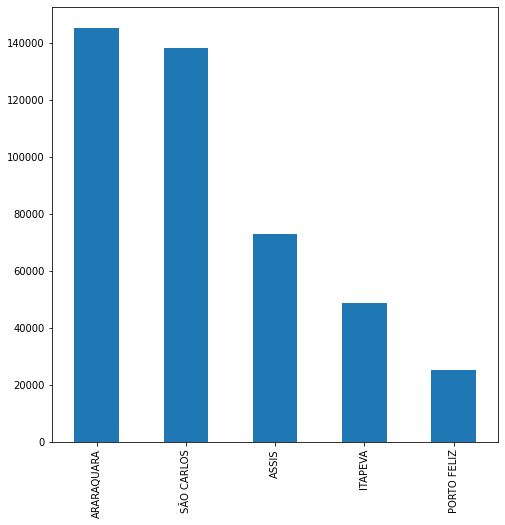

In [76]:
vaccination_best_cities.estabelecimento_municipio_nome.value_counts().plot(kind='bar')

<AxesSubplot:>

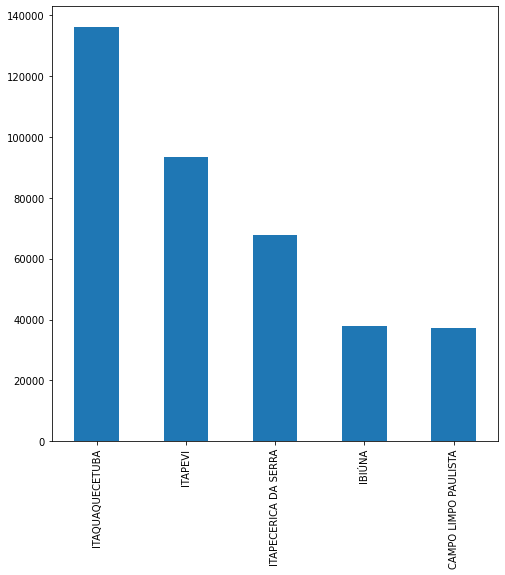

In [77]:
vaccination_worst_cities.estabelecimento_municipio_nome.value_counts().plot(kind='bar')

In [78]:
# Confirmando quantidade de valores ausentes
vaccination_best_cities.isnull().sum().sort_values(ascending=False)

vacina_categoria_nome             1180
paciente_idade                       0
paciente_enumsexobiologico           0
paciente_racacor_valor               0
estabelecimento_municipio_nome       0
vacina_dataaplicacao                 0
vacina_descricao_dose                0
vacina_nome                          0
vacina_dias_desde_aplicacao          0
dtype: int64

In [79]:
# Confirmando quantidade de valores ausentes
vaccination_worst_cities.isnull().sum().sort_values(ascending=False)

paciente_idade                    0
paciente_enumsexobiologico        0
paciente_racacor_valor            0
estabelecimento_municipio_nome    0
vacina_categoria_nome             0
vacina_dataaplicacao              0
vacina_descricao_dose             0
vacina_nome                       0
vacina_dias_desde_aplicacao       0
dtype: int64

Apenas o dataset do melhor cluster possui dados faltantes no nome da categoria da vacina.

### Variáveis numéricas

In [80]:
vaccination_best_cities[['paciente_idade', 
                         'vacina_dataaplicacao', 
                         'vacina_dias_desde_aplicacao']].describe(datetime_is_numeric=True)

paciente_idade           vacina_dataaplicacao  \
count   430594.000000                         430594   
mean        58.376025  2021-04-26 12:21:37.221977344   
min          4.000000            2021-01-18 00:00:00   
25%         47.000000            2021-03-24 00:00:00   
50%         59.000000            2021-04-28 00:00:00   
75%         71.000000            2021-06-08 00:00:00   
max        221.000000            2021-06-30 00:00:00   
std         16.455242                            NaN   

       vacina_dias_desde_aplicacao  
count                430594.000000  
mean                     64.484986  
min                       0.000000  
25%                      22.000000  
50%                      63.000000  
75%                      98.000000  
max                     163.000000  
std                      44.550586

In [81]:
vaccination_worst_cities[['paciente_idade', 
                         'vacina_dataaplicacao', 
                         'vacina_dias_desde_aplicacao']].describe(datetime_is_numeric=True)

paciente_idade           vacina_dataaplicacao  \
count   372289.000000                         372289   
mean        55.781046  2021-05-10 10:00:55.834043136   
min          0.000000            2021-01-17 00:00:00   
25%         46.000000            2021-04-13 00:00:00   
50%         55.000000            2021-05-17 00:00:00   
75%         67.000000            2021-06-18 00:00:00   
max        121.000000            2021-06-30 00:00:00   
std         14.794072                            NaN   

       vacina_dias_desde_aplicacao  
count                372289.000000  
mean                     50.582687  
min                       0.000000  
25%                      12.000000  
50%                      44.000000  
75%                      78.000000  
max                     164.000000  
std                      42.170190

*   **paciente_idade:** Nem todos os valores representam idades plausíveis de pessoas, o máximo chega a 221 anos, e o mínimo é 0, talvez possam ser bebês, ou possivelmente um erro, dado que pelo conhecimento do contexto, sabemos que bebês não estão sendo vacinado. É válido uma investigação mais aprofundada sobre isso. 
A média é do melhor cluster é 58 anos, o primeiro quartil é 47 anos, a mediana é 59 e o terceiro quartil é 71.
A média é do pior cluster é 55 anos, o primeiro quartil é 46 anos, a mediana é 55 e o terceiro quartil é 67.
Portanto podemos ver que a idade do pior cluster é levemente mais baixa que o do melhor cluster.

*  **vacina_dataaplicacao:** Todos os valores são plausíveis com a realidade. Os dados começam em 17 de janeiro de 2021 e terminam em 30 de junho de 2021, quando foram coletados. Podemos perceber que no melhor cluster a vacinação começou mais forte antes, com o primeiro quartil em 24/03/2021, mediana em 28/04/2021, terceiro quartil em 08/06/2021 e a média em 26/04/2021, enquanto que no pior cluster, o primeiro quartil é 13/04/2021, a mediana 18/06/2021, o terceiro quartil em 30/06/2021 e a média em 10/05/2021, 2 semanas depois do outro cluster.

*  **vacina_dias_desde_aplicacao:** Segue a mesma análise da data de aplicação. Podemos perceber que metade das pessoas vacinadas no melhor cluster foram feitas a mais de 63 dias, enquanto que no pior cluster a mais de 44 dias.

Uma outra forma de entender a distribuição dos valores das variáveis é pelo histograma. Com o histograma é possível observar a frequência que determinado valor aparece e se há ou não outliers.

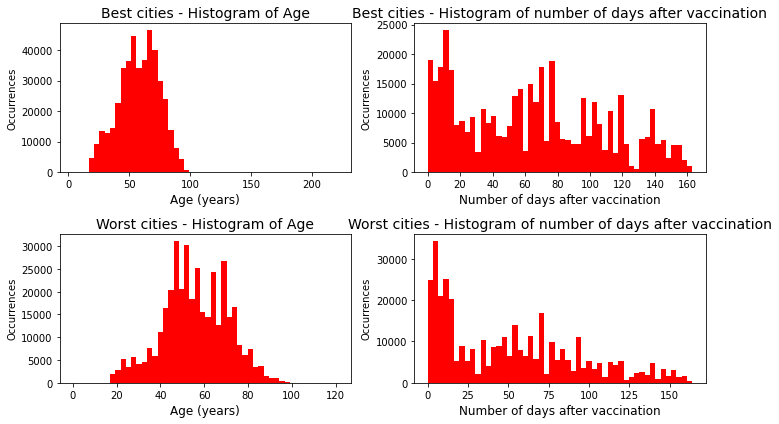

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

## Melhor cluster

# histograma paciente_idade
vaccination_best_cities['paciente_idade'].plot(kind="hist", ax=ax[0][0], color='r', bins=50)
ax[0][0].set_title('Best cities - Histogram of Age', fontsize=14)
ax[0][0].set_ylabel('Occurrences')
ax[0][0].set_xlabel('Age (years)', fontsize = 12)

# # histograma vacina_dias_desde_aplicacao
vaccination_best_cities['vacina_dias_desde_aplicacao'].plot(kind="hist", ax=ax[0][1], color='r', bins=50)
ax[0][1].set_title('Best cities - Histogram of number of days after vaccination', fontsize=14)
ax[0][1].set_ylabel('Occurrences')
ax[0][1].set_xlabel('Number of days after vaccination', fontsize = 12)

## Pior cluster

# histograma paciente_idade
vaccination_worst_cities['paciente_idade'].plot(kind="hist", ax=ax[1][0], color='r', bins=50)
ax[1][0].set_title('Worst cities - Histogram of Age', fontsize=14)
ax[1][0].set_ylabel('Occurrences')
ax[1][0].set_xlabel('Age (years)', fontsize = 12)

# # histograma vacina_dias_desde_aplicacao
vaccination_worst_cities['vacina_dias_desde_aplicacao'].plot(kind="hist", ax=ax[1][1], color='r', bins=50)
ax[1][1].set_title('Worst cities - Histogram of number of days after vaccination', fontsize=14)
ax[1][1].set_ylabel('Occurrences')
ax[1][1].set_xlabel('Number of days after vaccination', fontsize = 12)

fig.tight_layout();

Analisando os histogramas das variáveis numéricas do DataFrame, podemos observar algumas características que já observamos na análise estatística descritiva, além de outras que só é possível observar visualmente. 

*  **paciente_idade:** Podemos perceber que de fato a maioria das pessoas estão entre 40 e 80 anos, como visto na descrição, e no histograma é possível perceber raríssimos casos maiores que 100 anos, como esperado, possivelmente são outliers.

*  **vacina_dias_desde_aplicacao:** Podemos perceber que o início da vacinação foi mais lento, indicado pela quantidade de dias mais alta, e um aumento ao longo do tempo, com alguns picos, podendo as baixas representarem fins de semana, e maiores números recentemente.

Outra análise gráfica importante de ser feita é por meio do boxplot. Com ele, é possível visualizar o intervalo entre quartis e a presença, ou não, de outliers. Isso porque o boxplot segue a seguinte estrutura: todo ponto em um boxplot representa que há um valor na variável que pode ser considerado, por definição, como um outlier. 

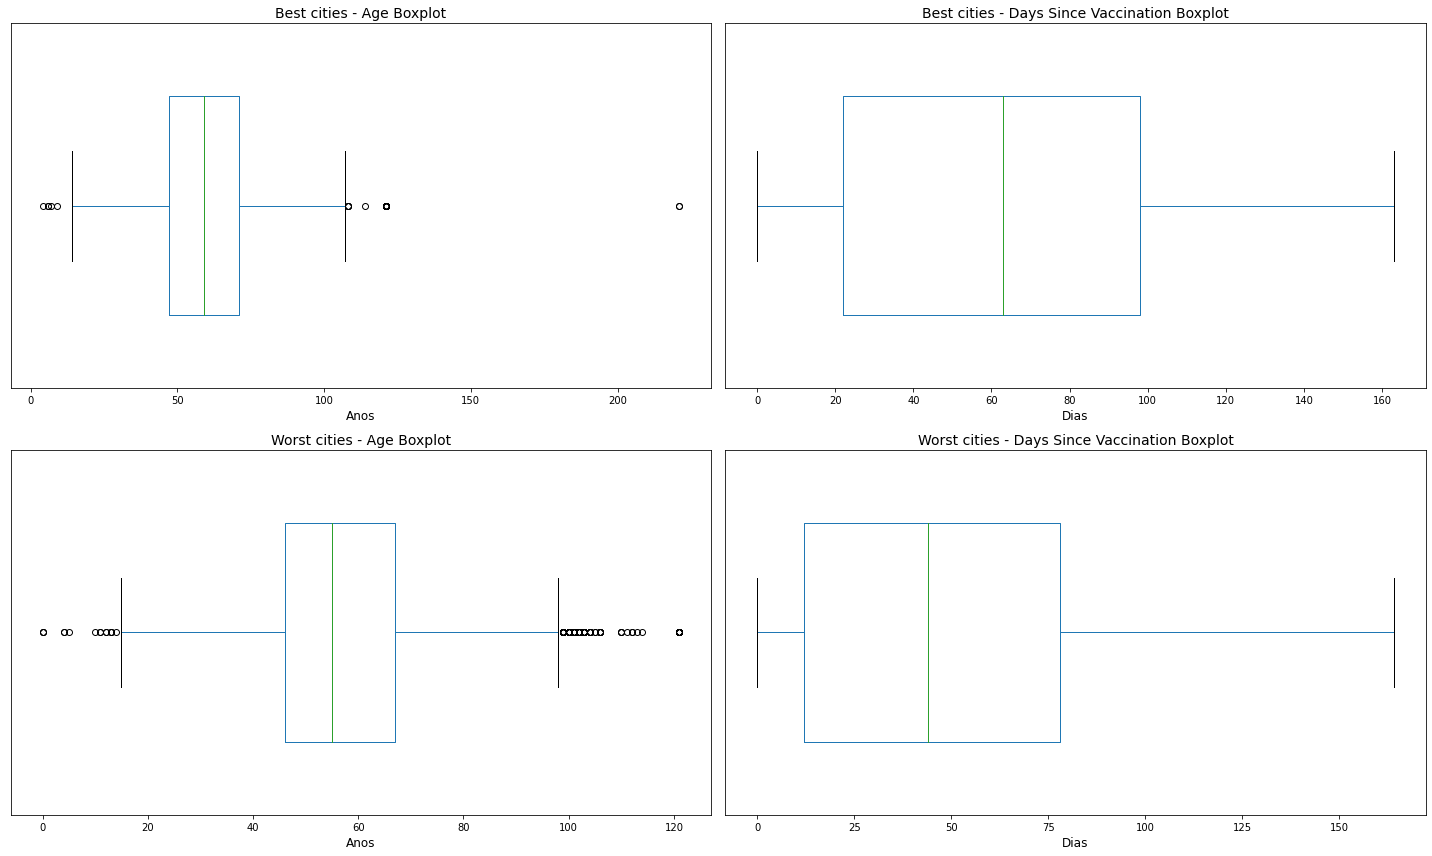

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

## Melhor cluster

# boxplot paciente_idade
vaccination_best_cities.boxplot(['paciente_idade'], ax=ax[0][0], vert=False, widths=0.6, grid=False)
ax[0][0].set_yticks([])
ax[0][0].set_xlabel('Anos', fontsize = 12)
ax[0][0].set_title('Best cities - Age Boxplot', fontsize=14)

# boxplot paciente_idade
vaccination_best_cities.boxplot(['vacina_dias_desde_aplicacao'], ax=ax[0][1], vert=False, widths=0.6, grid=False)
ax[0][1].set_yticks([])
ax[0][1].set_xlabel('Dias', fontsize = 12)
ax[0][1].set_title('Best cities - Days Since Vaccination Boxplot', fontsize=14)


## Pior cluster

# boxplot paciente_idade
vaccination_worst_cities.boxplot(['paciente_idade'], ax=ax[1][0], vert=False, widths=0.6, grid=False)
ax[1][0].set_yticks([])
ax[1][0].set_xlabel('Anos', fontsize = 12)
ax[1][0].set_title('Worst cities - Age Boxplot', fontsize=14)

# boxplot paciente_idade
vaccination_worst_cities.boxplot(['vacina_dias_desde_aplicacao'], ax=ax[1][1], vert=False, widths=0.6, grid=False)
ax[1][1].set_yticks([])
ax[1][1].set_xlabel('Dias', fontsize = 12)
ax[1][1].set_title('Worst cities - Days Since Vaccination Boxplot', fontsize=14)

fig.tight_layout();

In [84]:
# Exibindo valores dos limites inferiores e superiores de cada variável numérica
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['Variável'] = labels[i]
        dict1['Limite inferior'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['Q1'] = bp['boxes'][i].get_ydata()[1]
        dict1['Q2 - Mediana'] = bp['medians'][i].get_ydata()[1]
        dict1['Q3'] = bp['boxes'][i].get_ydata()[2]
        dict1['Limite superior'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Variável  Limite inferior    Q1  Q2 - Mediana    Q3  \
0               paciente_idade             14.0  47.0          59.0  71.0   
1  vacina_dias_desde_aplicacao              0.0  22.0          63.0  98.0   

   Limite superior  
0            107.0  
1            163.0

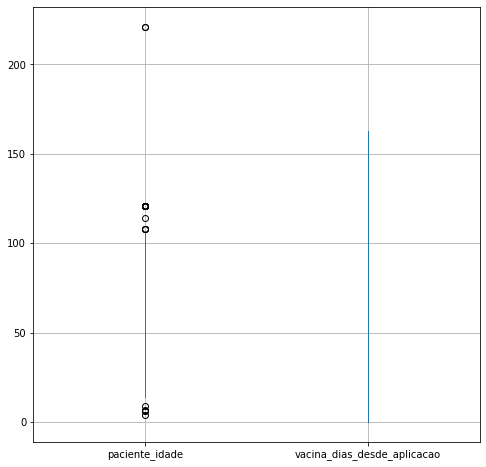

In [85]:
bp = vaccination_best_cities.boxplot(['paciente_idade', 'vacina_dias_desde_aplicacao'], return_type='dict', widths=0)
get_box_plot_data(labels=['paciente_idade', 'vacina_dias_desde_aplicacao'], bp=bp)

Variável  Limite inferior    Q1  Q2 - Mediana    Q3  \
0               paciente_idade             15.0  46.0          55.0  67.0   
1  vacina_dias_desde_aplicacao              0.0  12.0          44.0  78.0   

   Limite superior  
0             98.0  
1            164.0

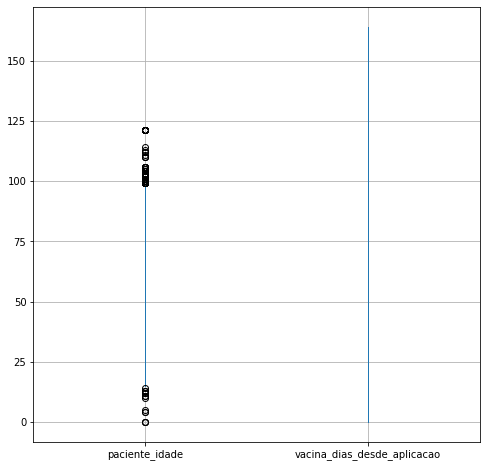

In [86]:
bp = vaccination_worst_cities.boxplot(['paciente_idade', 'vacina_dias_desde_aplicacao'], return_type='dict', widths=0)
get_box_plot_data(labels=['paciente_idade', 'vacina_dias_desde_aplicacao'], bp=bp)

**paciente_idade:** Na análise do histograma, sugerimos a presença de outliers e, de acordo com o boxplot, há sim outliers tanto à direita, com pacientes com idade maior que 107 anos no melhor cluster e 98 anos no pior cluster, quanto à esquerda, com pacientes com idades menores que 14 anos no melhor cluster e 15 anos no pior cluster. Talvez alguns desses outliers superiores sejam verdadeiros, porém, segundo registros, a pessoa mais velha do mundo, chegou até 122 anos de idade. E sobre os outliers inferiores, é possível que alguns deles também sejam verdadeiros, porém teoricamente só estão recebendo a vacinação pessoas maiores que 18 anos.

**vacina_dias_desde_aplicacao:** Podemos confirmar que não há outliers e os dados estão mais inclinados à esquerda (recente), sendo que o pior cluster de fato se concentra mais na recência do que o melhor cluster.

## Variáveis categóricas

{'F': 252355, 'M': 178239}


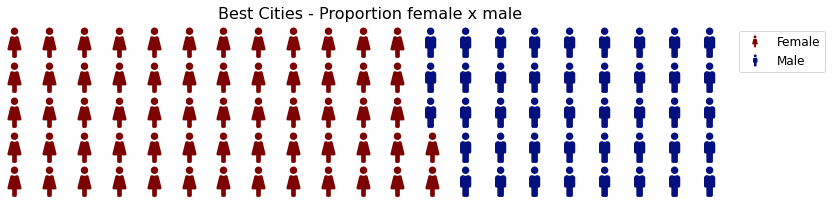

In [87]:
# extrair value counts da variavel
sex = vaccination_best_cities['paciente_enumsexobiologico'].value_counts().to_dict()
print(sex)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=("#7D0303","#03107D"),
                title={'label': 'Best Cities - Proportion female x male',  'fontsize': 16},
                values=sex, 
                icons=('female','male'), 
                icon_size=30, 
                labels=('Female','Male'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

{'F': 211250, 'M': 161039}


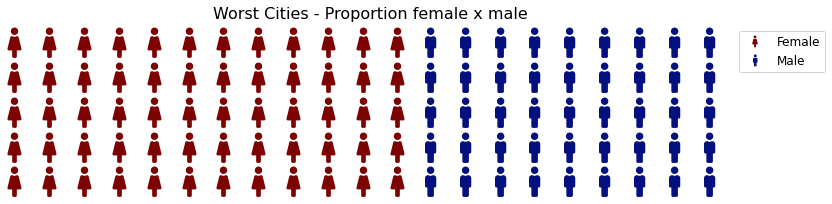

In [88]:
# extrair value counts da variavel
sex = vaccination_worst_cities['paciente_enumsexobiologico'].value_counts().to_dict()
print(sex)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=("#7D0303","#03107D"),
                title={'label': 'Worst Cities - Proportion female x male',  'fontsize': 16},
                values=sex, 
                icons=('female','male'), 
                icon_size=30, 
                labels=('Female','Male'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos confirmar que, em ambos os clusters, a proporção de mulheres no DataFrame é levemente superior à proporção de homens.

{'BRANCA': 264944, 'SEM INFORMACAO': 110606, 'PARDA': 26475, 'AMARELA': 14369, 'PRETA': 14090, 'INDIGENA': 110}


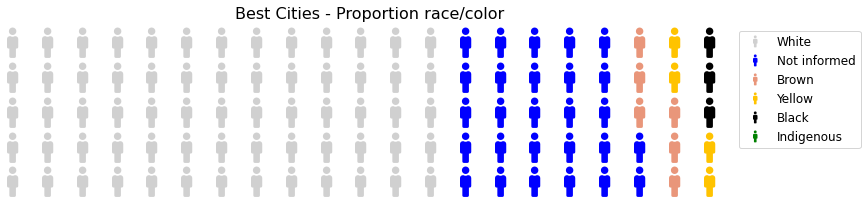

In [89]:
# extrair value counts da variavel
raca = vaccination_best_cities['paciente_racacor_valor'].value_counts().to_dict()
print(raca)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=('#D0D0D0', '#0000FF', '#E9967A', '#FFC300', '#000000', '#008000'),
                title={'label': 'Best Cities - Proportion race/color',  'fontsize': 16},
                values=raca, 
                icons=('male'), 
                icon_size=30, 
                labels=('White','Not informed','Brown', 'Yellow', 'Black', 'Indigenous'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

{'BRANCA': 148911, 'SEM INFORMACAO': 116197, 'AMARELA': 48009, 'PARDA': 43471, 'PRETA': 15522, 'INDIGENA': 179}


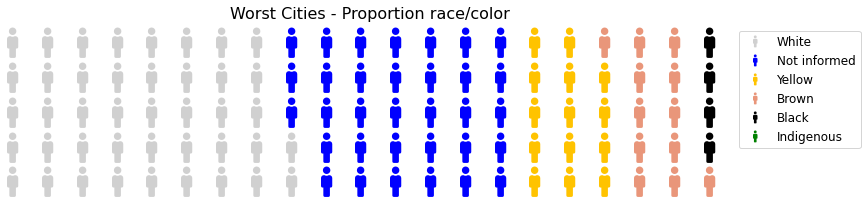

In [90]:
# extrair value counts da variavel
raca = vaccination_worst_cities['paciente_racacor_valor'].value_counts().to_dict()
print(raca)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=('#D0D0D0', '#0000FF', '#FFC300', '#E9967A', '#000000', '#008000'),
                title={'label': 'Worst Cities - Proportion race/color',  'fontsize': 16},
                values=raca, 
                icons=('male'), 
                icon_size=30, 
                labels=('White','Not informed', 'Yellow', 'Brown', 'Black', 'Indigenous'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a proporção da população vacinada é bem diferente entre os dois clusters. No melhor cluster, podemos perceber que mais da metade da população vacinada é branca, do restante grande parte é não informado e uma pequena população é parda e amarela e por fim uma proporção bem pequena é preta e quase imperceptível é indígena.

Já no pior cluster, menos da metade da população vacinada é branca, quase a mesma proporção do outro cluster é não informado, e tem-se aqui uma proporção maior de amarelo e pardo, e também por fim uma proporção bem pequena é preta e quase imperceptível é indígena.

{'Faixa Etária': 284839, 'Trabalhadores de Saúde': 65975, 'Comorbidades': 52946, 'Trabalhadores da Educação': 19536, 'Pessoas de 60 anos ou mais institucionalizadas': 2144, 'Trabalhadores de Transporte': 2012, 'Pessoas com Deficiência': 1465, 'Povos e Comunidades Tradicionais': 343, 'Pessoas em Situação de Rua': 142, 'Povos Indígenas': 9, 'Forças de Segurança e Salvamento': 3}


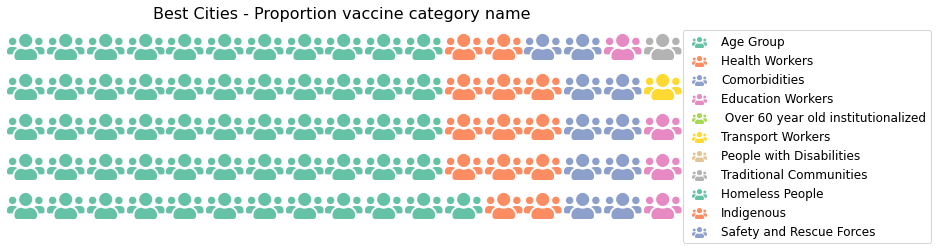

In [91]:
# extrair value counts da variavel
categoria = vaccination_best_cities['vacina_categoria_nome'].value_counts().to_dict()
print(categoria)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=17,
                title={'label': 'Best Cities - Proportion vaccine category name',  'fontsize': 16},
                values=categoria, 
                icons=('users'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels=('Age Group','Health Workers', 'Comorbidities','Education Workers',
                        ' Over 60 year old institutionalized', 'Transport Workers',  'People with Disabilities', 
                        'Traditional Communities',  'Homeless People', 'Indigenous', 'Safety and Rescue Forces'),
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

{'Faixa Etária': 257217, 'Comorbidades': 55589, 'Trabalhadores de Saúde': 37859, 'Trabalhadores da Educação': 17633, 'Pessoas de 60 anos ou mais institucionalizadas': 1469, 'Trabalhadores de Transporte': 1148, 'Pessoas com Deficiência': 1131, 'Pessoas em Situação de Rua': 185, 'Povos Indígenas': 32, 'Povos e Comunidades Tradicionais': 15, 'Trabalhadores Portuários': 7, 'Trabalhadores Industriais': 4}


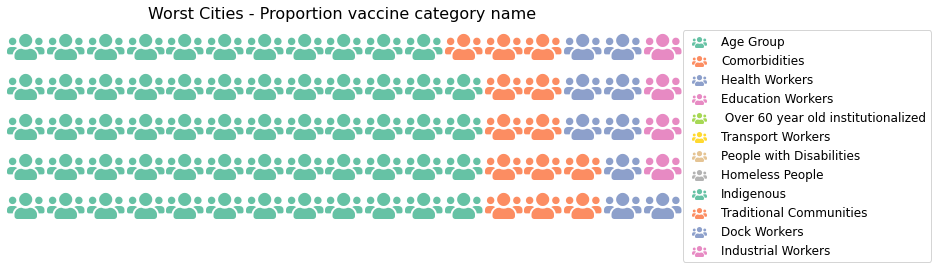

In [92]:
# extrair value counts da variavel
categoria = vaccination_worst_cities['vacina_categoria_nome'].value_counts().to_dict()
print(categoria)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=17,
                title={'label': 'Worst Cities - Proportion vaccine category name',  'fontsize': 16},
                values=categoria, 
                icons=('users'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels=('Age Group', 'Comorbidities', 'Health Workers','Education Workers',
                        ' Over 60 year old institutionalized', 'Transport Workers',  'People with Disabilities', 
                         'Homeless People', 'Indigenous','Traditional Communities',  'Dock Workers', 
                        'Industrial Workers'),
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que em ambos os clusters, a grande maioria foi vacinada na categória de faixa etária.

No melhor cluster, a segunda categoria mais vacinada são trabalhadores da saúde, depois comorbidades e profissionais da educação. Já no pior cluster, a segunda categoria mais vacinada são comorbidades, seguido de trabalhadores da saúde e depois trabalhadores da educação. Os outros grupos são bem menos representativos.

{'Vacina Covid-19 - Covishield': 204546, 'Covid-19-Coronavac-Sinovac/Butantan': 202741, 'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer': 22214, 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag': 1093}


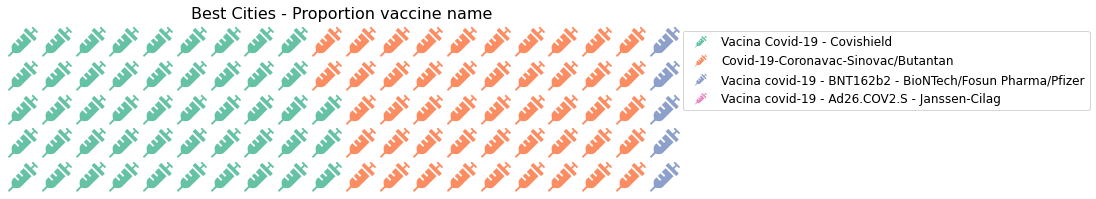

In [93]:
# extrair value counts da variavel
vacina = vaccination_best_cities['vacina_nome'].value_counts().to_dict()
print(vacina)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=20,
                title={'label': 'Best Cities - Proportion vaccine name',  'fontsize': 16},
                values=vacina, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

{'Vacina Covid-19 - Covishield': 196376, 'Covid-19-Coronavac-Sinovac/Butantan': 143217, 'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer': 24316, 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag': 8380}


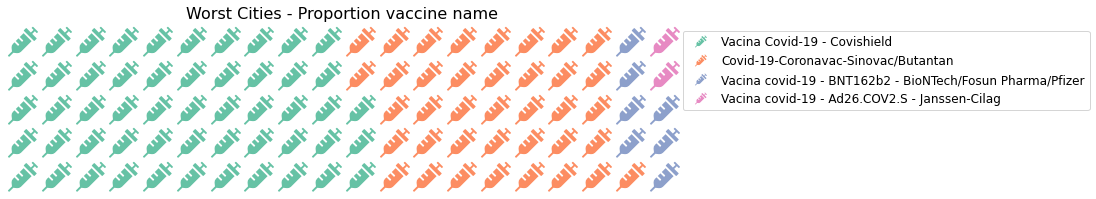

In [94]:
# extrair value counts da variavel
vacina = vaccination_worst_cities['vacina_nome'].value_counts().to_dict()
print(vacina)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=20,
                title={'label': 'Worst Cities - Proportion vaccine name',  'fontsize': 16},
                values=vacina, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a distribuição da Covishield (Astrazeneca) e Coronavac são bem semelhantes entre si, com uma proporção pequena da PFIZER e quase insignificante da JANSSEN, esta última aparece um pouco mais no pior cluster.

{'1ª\xa0Dose': 315724, '2ª\xa0Dose': 113777, 'Dose\xa0': 558, 'Única\xa0': 535}


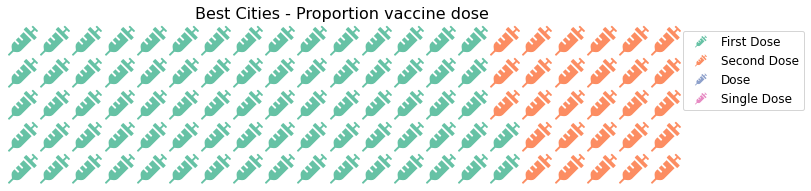

In [95]:
# extrair value counts da variavel
dose = vaccination_best_cities['vacina_descricao_dose'].value_counts().to_dict()
print(dose)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Best Cities - Proportion vaccine dose',  'fontsize': 16},
                values=dose, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels=('First Dose','Second Dose', 'Dose', 'Single Dose'),
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

{'1ª\xa0Dose': 290707, '2ª\xa0Dose': 73201, 'Dose\xa0': 4423, 'Única\xa0': 3957, 'Dose\xa0Adicional\xa0': 1}


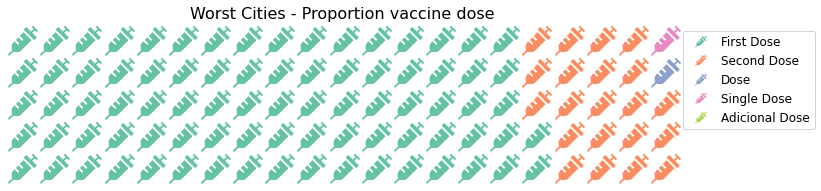

In [96]:
# extrair value counts da variavel
dose = vaccination_worst_cities['vacina_descricao_dose'].value_counts().to_dict()
print(dose)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Worst Cities - Proportion vaccine dose',  'fontsize': 16},
                values=dose, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels=('First Dose','Second Dose', 'Dose', 'Single Dose', 'Adicional Dose'),
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria da vacinação foi aplicação da primeira dose, e no melhor cluster tem-se uma proporção um pouco maior de aplicação da segunda dose do que no pior cluster. A dose única (da vacina Janssen) está presente, mas com quantidade bem menor.

### Tratamento dos dados - Valores inválidos, outliers e dados faltantes

Como vimos na análise, percebemos outliers na idade do paciente, tanto à direita, quanto à esquerda. Seria necessário uma conversa com especialistas para garantir que são valores inválidos de fato, como não temos esse contato, vamos nos restringir às regras de vacinação, que são para pessoas maiores de 18 anos e colocaremos como limitante superior o registro de pessoa mais velho do mundo, que é 122 anos.

In [97]:
print(f"""Vamos eliminar {len(vaccination_worst_cities) - len(vaccination_worst_cities[(vaccination_worst_cities.paciente_idade>=18)&(vaccination_worst_cities.paciente_idade<=122)])} pessoas no pior cluster 
e {len(vaccination_best_cities) - len(vaccination_best_cities[(vaccination_best_cities.paciente_idade>=18)&(vaccination_best_cities.paciente_idade<=122)])} pessoas no melhor cluster.""")

Vamos eliminar 52 pessoas no pior cluster 
e 48 pessoas no melhor cluster.


In [98]:
vaccination_worst_cities = vaccination_worst_cities[(vaccination_worst_cities.paciente_idade>=18)&(vaccination_worst_cities.paciente_idade<=122)]
vaccination_best_cities = vaccination_best_cities[(vaccination_best_cities.paciente_idade>=18)&(vaccination_best_cities.paciente_idade<=122)]

## Segunda onda

In [99]:
#Importar dados de saneamento
covid_data = pd.read_csv('datasets/dados_covid_municipios_sp.csv', sep=';')
covid_data = covid_data[['nome_munic', 'datahora', 'casos_novos', 'casos_pc', 'casos',
                         'obitos_novos', 'obitos_pc', 'obitos', 'pop']]
covid_data['mortality'] = covid_data['obitos']/covid_data['casos']
covid_data['mortality'] = covid_data['mortality'].fillna(0)
covid_data.nome_munic = covid_data.nome_munic.apply(lambda x: x.upper())
covid_data.datahora = covid_data.datahora.apply(lambda x: f'{x[6:10]}-{x[3:5]}-{x[0:2]}')
covid_data_best_cities = covid_data[covid_data.nome_munic.isin(list_top_best_cities)].reset_index(drop=True)
covid_data_worst_cities = covid_data[covid_data.nome_munic.isin(list_top_worst_cities)].reset_index(drop=True)

In [100]:
covid_data_best_cities

nome_munic    datahora  casos_novos  casos_pc  casos  obitos_novos  \
0      ARARAQUARA  2020-02-25            0         0      0             0   
1           ASSIS  2020-02-25            0         0      0             0   
2         ITAPEVA  2020-02-25            0         0      0             0   
3     PORTO FELIZ  2020-02-25            0         0      0             0   
4      SÃO CARLOS  2020-02-25            0         0      0             0   
...           ...         ...          ...       ...    ...           ...   
2560   ARARAQUARA  2021-07-21           78     10133  23065             0   
2561        ASSIS  2021-07-21           35     10910  11061             0   
2562      ITAPEVA  2021-07-21           96      9895   9073             2   
2563  PORTO FELIZ  2021-07-21          112     16045   8295             1   
2564   SÃO CARLOS  2021-07-21          167     10119  24552             2   

      obitos_pc  obitos     pop  mortality  
0             0       0  227618   0.000000  
1             0       0  101381   0.000000  
2             0       0   91693   0.000000  
3             0       0   51697   0.000000  
4             0       0  242632   0.000000  
...         ...     ...     ...        ...  
2560        204     464  227618   0.020117  
2561        381     386  101381   0.034897  
2562        445     408   91693   0.044969  
2563        253     131   51697   0.015793  
2564        196     475  242632   0.019347  

[2565 rows x 10 columns]

In [101]:
covid_data_worst_cities

nome_munic    datahora  casos_novos  casos_pc  casos  \
0     CAMPO LIMPO PAULISTA  2020-02-25            0         0      0   
1                   IBIÚNA  2020-02-25            0         0      0   
2     ITAPECERICA DA SERRA  2020-02-25            0         0      0   
3                  ITAPEVI  2020-02-25            0         0      0   
4          ITAQUAQUECETUBA  2020-02-25            0         0      0   
...                    ...         ...          ...       ...    ...   
2560  CAMPO LIMPO PAULISTA  2021-07-21           24      6674   5529   
2561                IBIÚNA  2021-07-21           27      6237   4767   
2562  ITAPECERICA DA SERRA  2021-07-21           25      4576   7762   
2563               ITAPEVI  2021-07-21           11      4925  11708   
2564       ITAQUAQUECETUBA  2021-07-21           68      4903  18169   

      obitos_novos  obitos_pc  obitos     pop  mortality  
0                0          0       0   82842   0.000000  
1                0          0       0   76430   0.000000  
2                0          0       0  169619   0.000000  
3                0          0       0  237714   0.000000  
4                0          0       0  370589   0.000000  
...            ...        ...     ...     ...        ...  
2560             0        305     253   82842   0.045759  
2561             1        165     126   76430   0.026432  
2562             0        257     436  169619   0.056171  
2563             1        275     653  237714   0.055774  
2564             1        244     905  370589   0.049810  

[2565 rows x 10 columns]

In [102]:
# Adicionando coluna de população
for city in vaccination_best_cities.estabelecimento_municipio_nome.unique():
    vaccination_best_cities.loc[vaccination_best_cities.estabelecimento_municipio_nome==city, 'pop'] = covid_data_best_cities['pop'].loc[covid_data_best_cities.nome_munic==city].iloc[0]
    
# Adicionando coluna de população
for city in vaccination_worst_cities.estabelecimento_municipio_nome.unique():
    vaccination_worst_cities.loc[vaccination_worst_cities.estabelecimento_municipio_nome==city, 'pop'] = covid_data_worst_cities['pop'].loc[covid_data_worst_cities.nome_munic==city].iloc[0]

In [103]:
def plot_grafico_dia(df, data_col, y_col, cores=False, cores_col=None, 
                     titulo="Grafico por dia", 
                     label_x="Date", label_y="Numero"):

    # Função que plota gráfico por dia
    # Parâmetros da função:
    #   df: DataFrame
    #   data_col: coluna de serie temporal
    #   y_col: coluna com o valor a ser plotado
    #   cores: bool --> se True, indica que devem ser plotadas mais de uma informaçao no mesmo gráficos, cada info terá uma cor diferente
    #   cores_col: coluna do DataFrame --> deve ser indicado se cores=True
    #   titulo: título do gráfico
    #   label_x: título do eixo X
    #   label_y: título do eixo Y

    if cores == True:
        time_series = df.groupby([data_col, cores_col]).sum()[y_col].reset_index(level=[cores_col])
        fig = px.line(time_series, x=time_series.index, y=y_col, color=cores_col, title=titulo)

    else:
        time_series = df.groupby([data_col]).sum()[y_col]
        fig = px.line(time_series, x=time_series.index, y=y_col, title=titulo)
        
    fig.update_yaxes(title=label_y)
    fig.update_xaxes(title=label_x)
    fig.update_layout(font=dict(size=14))
    fig.show()
    
    

def plot_grafico_acumulado(df, data_col, cores=False, cores_col=None, 
                           titulo="Gráfico acumulado", label_x="Date", label_y="Numero"):

    # Função que plota gráfico de variável acumulada ao longo dos dias
    # Parâmetros da função:
    #   df: DataFrame
    #   data_col: coluna de serie temporal
    #   cores: bool --> se True, indica que devem ser plotadas mais de uma informaçao no mesmo gráficos, cada info terá uma cor diferente
    #   cores_col: coluna do DataFrame --> deve ser indicado se cores=True
    #   titulo: título do gráfico
    #   label_x: título do eixo X
    #   label_y: título do eixo Y

    df['numero_pessoas'] = 1
    if cores == True:
        time_series = df.groupby([data_col, cores_col]).count()['numero_pessoas']
        time_series_cum = time_series.groupby(level=-1).cumsum()
        time_series_cum = time_series_cum.reset_index(level=[cores_col])
        fig = px.line(time_series_cum, x=time_series_cum.index, y='numero_pessoas', color=cores_col, title=titulo)

    else:
        time_series_cum = (df.groupby([data_col]).count()['numero_pessoas']).cumsum()
        fig = px.line(time_series_cum, x=time_series_cum.index, y='numero_pessoas', title=titulo)
        
    fig.update_yaxes(title=label_y)
    fig.update_xaxes(title=label_x)
    fig.update_layout(font=dict(size=14))
    fig.show()
    
def plot_grafico_acumulado_proportion(df, data_col, cores=False, cores_col=None, pop_col=None, 
                                                  titulo="Gráfico acumulado", label_x="Date", label_y="Numero"):

    # Função que plota gráfico de variável acumulada ao longo dos dias
    # Parâmetros da função:
    #   df: DataFrame
    #   data_col: coluna de serie temporal
    #   pop_col: coluna com o tamanho da populacao
    #   cores: bool --> se True, indica que devem ser plotadas mais de uma informaçao no mesmo gráficos, cada info terá uma cor diferente
    #   cores_col: coluna do DataFrame --> deve ser indicado se cores=True
    #   titulo: título do gráfico
    #   label_x: título do eixo X
    #   label_y: título do eixo Y

    df['numero_pessoas'] = 1
    time_series = df.groupby([data_col, cores_col, pop_col]).count()['numero_pessoas']
    time_series_cum = time_series.groupby(level=-1).cumsum()
    time_series_cum = time_series_cum.reset_index(level=[cores_col, pop_col])
    time_series_cum['proporcao_populacao'] = time_series_cum['numero_pessoas']/time_series_cum[pop_col]
    fig = px.line(time_series_cum, x=time_series_cum.index, y='proporcao_populacao', color=cores_col, title=titulo)
        
    fig.update_yaxes(title=label_y)
    fig.update_xaxes(title=label_x)
    fig.update_layout(font=dict(size=14))
    fig.show()

## Best cities

In [104]:
plot_grafico_dia(df=covid_data_best_cities, data_col='datahora', y_col='obitos',
                 cores=True, cores_col='nome_munic', titulo='Best cities cumulative deaths', label_y="Deaths")

In [105]:
plot_grafico_dia(df=covid_data_best_cities, data_col='datahora', y_col='obitos_pc', cores=True, 
                 cores_col='nome_munic', titulo='Best cities cumulative deaths per 100k inhabitants', label_y="Deaths/100k inhabitants")

In [106]:
plot_grafico_dia(df=covid_data_best_cities, data_col='datahora', y_col='obitos_novos', cores=True, 
                 cores_col='nome_munic', titulo='Best cities new deaths', label_y="Deaths")

In [107]:
plot_grafico_dia(df=covid_data_best_cities, data_col='datahora', y_col='mortality',
                 cores=True, cores_col='nome_munic', titulo='Best cities mortality', label_y="Mortality")

In [108]:
plot_grafico_acumulado(df=vaccination_best_cities, data_col='vacina_dataaplicacao', cores=True, 
                       cores_col='estabelecimento_municipio_nome', titulo='Best cities cumulative vaccination', label_y="Vaccine Doses Received")

In [109]:
plot_grafico_acumulado_proportion(df=vaccination_best_cities, data_col='vacina_dataaplicacao', cores=True, 
                                           cores_col='estabelecimento_municipio_nome', pop_col='pop', 
                                           titulo='Best cities cumulative vaccination proportion', label_y="Proportion Vaccine Doses Received")

## Worst cities

In [110]:
plot_grafico_dia(df=covid_data_worst_cities, data_col='datahora', y_col='obitos',
                 cores=True, cores_col='nome_munic', titulo='Worst cities cumulative deaths', label_y="Deaths")

In [111]:
plot_grafico_dia(df=covid_data_worst_cities, data_col='datahora', y_col='obitos_pc', cores=True, cores_col='nome_munic', 
                 titulo='Worst cities cumulative deaths per 100k inhabitants', label_y="Deaths/100k inhabitants")

In [112]:
plot_grafico_dia(df=covid_data_worst_cities, data_col='datahora', y_col='obitos_novos', cores=True, 
                 cores_col='nome_munic', titulo='Worst cities new deaths', label_y="Deaths")

In [113]:
plot_grafico_dia(df=covid_data_worst_cities, data_col='datahora', y_col='mortality',
                 cores=True, cores_col='nome_munic', titulo='Worst cities mortality', label_y="Mortality")

In [114]:
plot_grafico_acumulado(df=vaccination_worst_cities, data_col='vacina_dataaplicacao', cores=True, 
                       cores_col='estabelecimento_municipio_nome', titulo='Worst cities cumulative vaccination', label_y="Vaccine Doses Received")

In [115]:
plot_grafico_acumulado_proportion(df=vaccination_worst_cities, data_col='vacina_dataaplicacao', cores=True, 
                                           cores_col='estabelecimento_municipio_nome', pop_col='pop', 
                                           titulo='Worst cities cumulative vaccination proportion', label_y="Proportion Vaccine Doses Received")

## Best + Worst cities

In [116]:
plot_grafico_acumulado_proportion(df=pd.concat([vaccination_best_cities,vaccination_worst_cities]), data_col='vacina_dataaplicacao', cores=True, 
                                           cores_col='estabelecimento_municipio_nome', pop_col='pop', 
                                           titulo='Cumulative vaccination proportion', label_y="Proportion Vaccine Doses Received")

Podemos perceber que a vacinação está mais rádida nas cidades do melhor cluster.

In [117]:
plot_grafico_dia(df=pd.concat([covid_data_best_cities,covid_data_worst_cities]), data_col='datahora', y_col='obitos_pc', cores=True, cores_col='nome_munic', 
                 titulo='Cumulative deaths per 100k inhabitants', label_y="Deaths/100k inhabitants")

In [118]:
plot_grafico_dia(df=pd.concat([covid_data_best_cities,covid_data_worst_cities]), data_col='datahora', y_col='mortality',
                 cores=True, cores_col='nome_munic', titulo='Mortality', label_y="Mortality")